In [1]:
import gensim
import pandas as pd
import numpy as np
import pickle as pkl

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

%matplotlib inline

# Plotting

In [2]:
# DISCLAIMER

# This block's Original source code for GensimWord2vecPlotter helper class
# taken at: https://soumilshah1995.blogspot.com/2020/05/gensim-word2vec-visualization-helper.html

# Modifications were made by me (Aleksa Kostic) today April 24, 2022 as necessary
# for visualization purposes. Figures can be found in "/capstone/figures/"

from sklearn.decomposition import PCA
import pandas as pd
import os
import numpy as np
from gensim.models import Word2Vec


class GensimWord2vecPlotter(object):

    __slots__ = ["model", "words", "result", "_tem"]

    def __init__(self, model):
        self.model = model
        self.words = None
        self.result = None
        self._tem = self.preprocess()

    def plot_scatter_words(self, Size=80):
        SIZE = Size
        words = self.words
        result = self.result
        model = self.model
        plt.figure(figsize=(16, 11))
        """for i, word in enumerate(words):
            if i == SIZE:
                break
            
            plt.annotate(word,
                         xy=(result[i, 0], result[i, 1]),
                         horizontalalignment='left',verticalalignment='bottom')"""

        plt.scatter(result[:SIZE, 0], result[:SIZE, 1],s=(40,),color='black', alpha=0.2)
        title = f"Window: {model.window};  Min count: {model.min_count};  Epochs: {model.epochs}"
        plt.title(title)
        plt.grid(True, alpha=0.4)
        plt.legend()


    def preprocess(self):
        """
        Pre Processing sets all the variable in constructor
        :return: None
        """
        model = self.model
        X = model.wv[model.wv.key_to_index]
        pca = PCA(n_components=2)
        result = pca.fit_transform(X)
        words = list(model.wv.key_to_index)
        self.words = words
        self.result = result

    def getPandasDF(self):
        result = self.result
        words = self.words
        
        x = [result[i, 0]  for i, word in enumerate(words)  ]
        y = [result[i, 1]  for i, word in enumerate(words)  ]

        wordsdf = pd.DataFrame(data={
            "words":words,
            "x":x,
            "y":y
        })
        
        return wordsdf


    def plot_catter(self):

        model = self.model
        X = model.wv[model.wv.key_to_index]
        result = self.result
        words = self.words

        x = [result[i, 0]  for i, word in enumerate(words)  ]
        y = [result[i, 1]  for i, word in enumerate(words)  ]

        wordsdf = pd.DataFrame(data={
            "words":words,
            "x":x,
            "y":y
        })
        wordsdf.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [3]:
def plotwords(model, word, color, df):
    for w in [q[0] for q in model.wv.most_similar(word)]:
        plt.annotate(w, 
                     xy=(df[df['words']==w].x.item(),
                         df[df['words']==w].y.item()),
                     color=color,fontweight='bold')

1 twitter_models\word2vec-minibatch-1-model-2.model


No handles with labels found to put in legend.


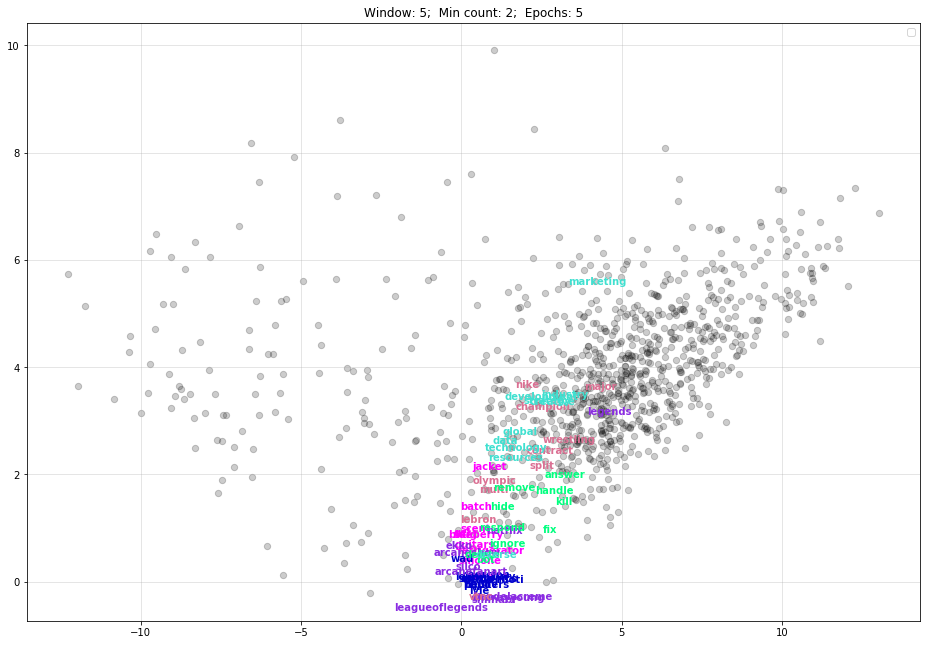

2 twitter_models\word2vec-minibatch-1-model-2.model.syn1neg.npy
3 twitter_models\word2vec-minibatch-1-model-2.model.wv.vectors.npy
4 twitter_models\word2vec-minibatch-1-model-3.model


No handles with labels found to put in legend.


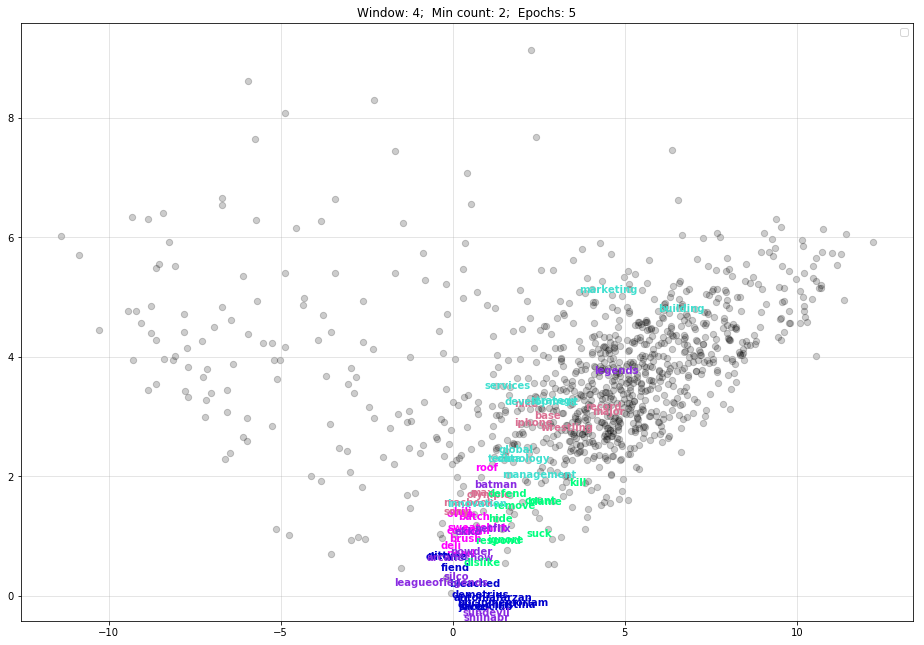

5 twitter_models\word2vec-minibatch-1-model-3.model.syn1neg.npy
6 twitter_models\word2vec-minibatch-1-model-3.model.wv.vectors.npy
7 twitter_models\word2vec-minibatch-1.model


No handles with labels found to put in legend.


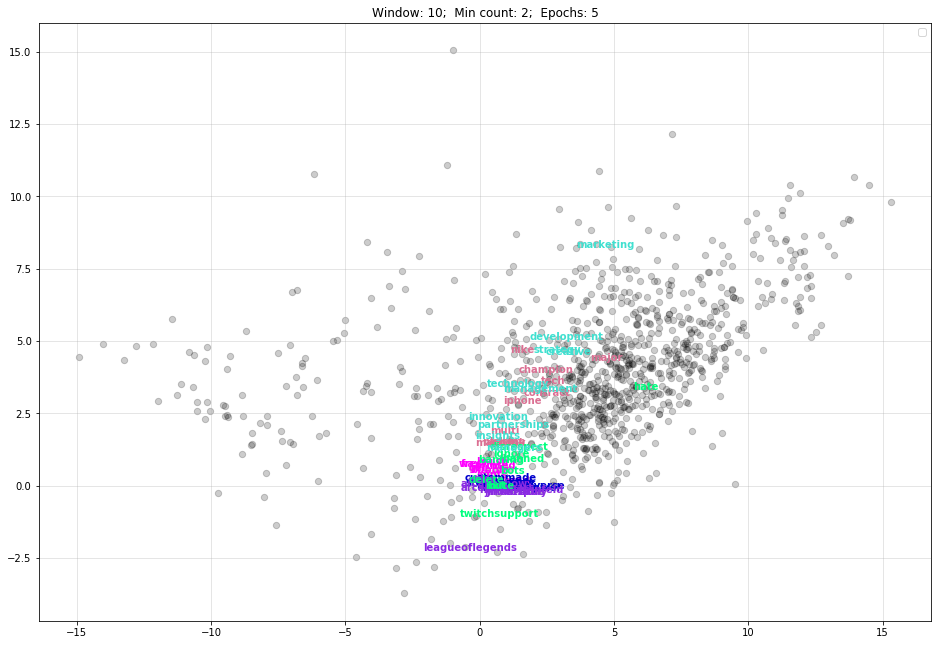

8 twitter_models\word2vec-minibatch-1.model.syn1neg.npy
9 twitter_models\word2vec-minibatch-1.model.wv.vectors.npy
10 twitter_models\word2vec_10-window_2-min_10-epochs.model


No handles with labels found to put in legend.


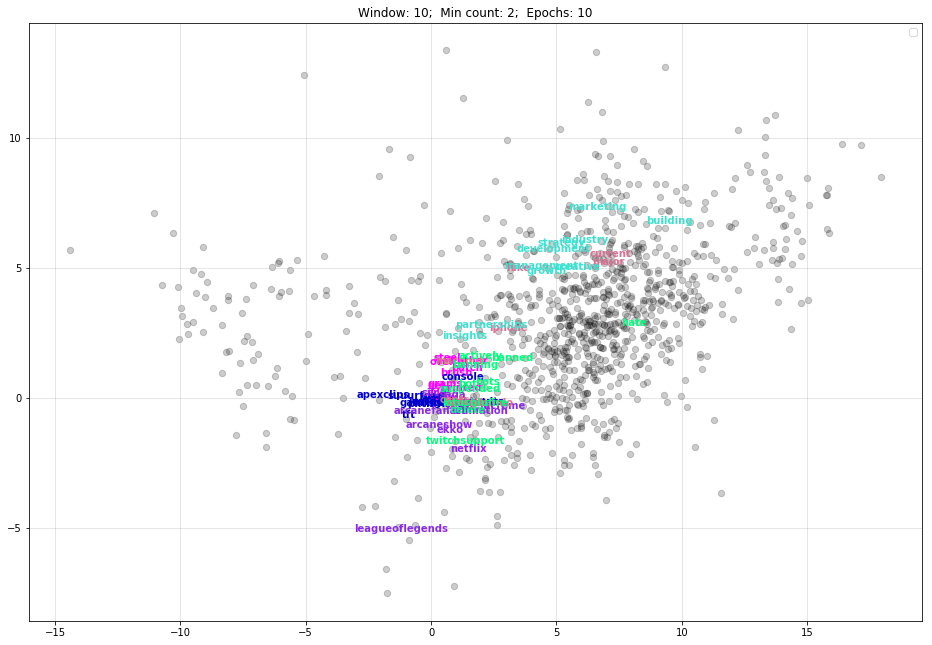

11 twitter_models\word2vec_10-window_2-min_10-epochs.model.syn1neg.npy
12 twitter_models\word2vec_10-window_2-min_10-epochs.model.wv.vectors.npy
13 twitter_models\word2vec_10-window_2-min_15-epochs.model


No handles with labels found to put in legend.


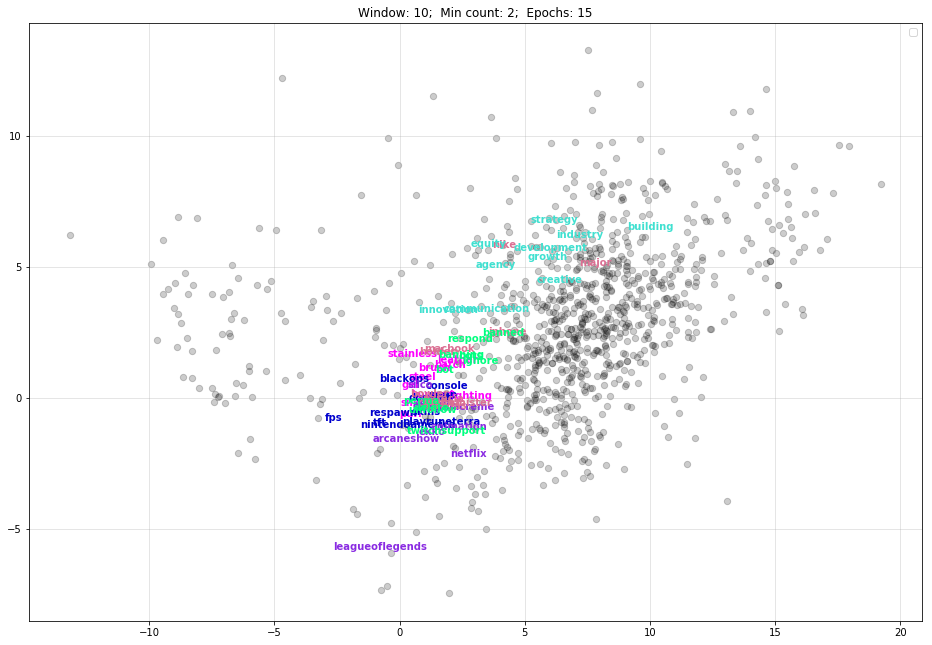

14 twitter_models\word2vec_10-window_2-min_15-epochs.model.syn1neg.npy
15 twitter_models\word2vec_10-window_2-min_15-epochs.model.wv.vectors.npy
16 twitter_models\word2vec_10-window_2-min_5-epochs.model


No handles with labels found to put in legend.


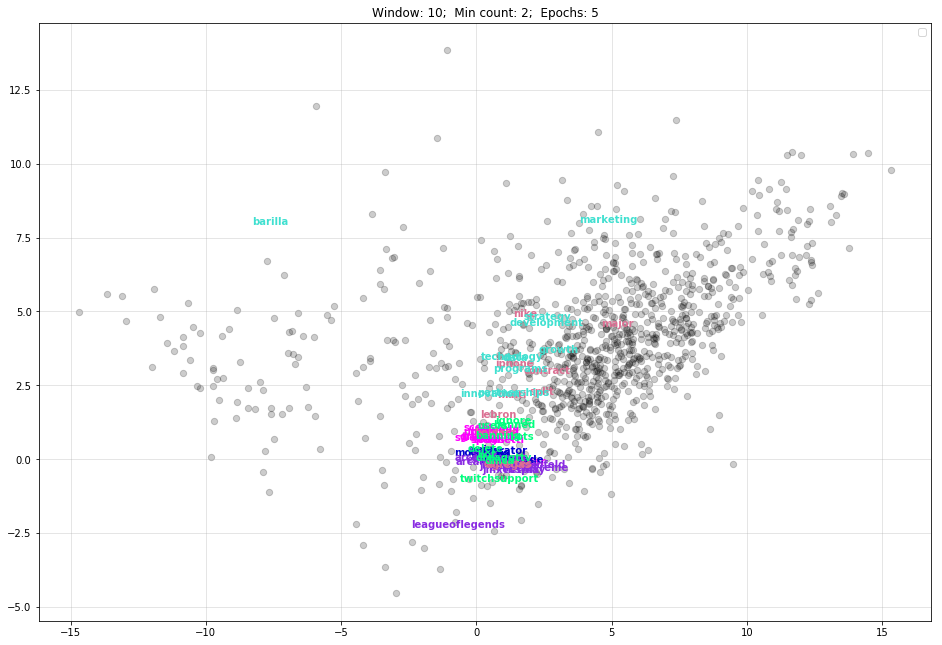

17 twitter_models\word2vec_10-window_2-min_5-epochs.model.syn1neg.npy
18 twitter_models\word2vec_10-window_2-min_5-epochs.model.wv.vectors.npy
19 twitter_models\word2vec_10-window_3-min_10-epochs.model


No handles with labels found to put in legend.


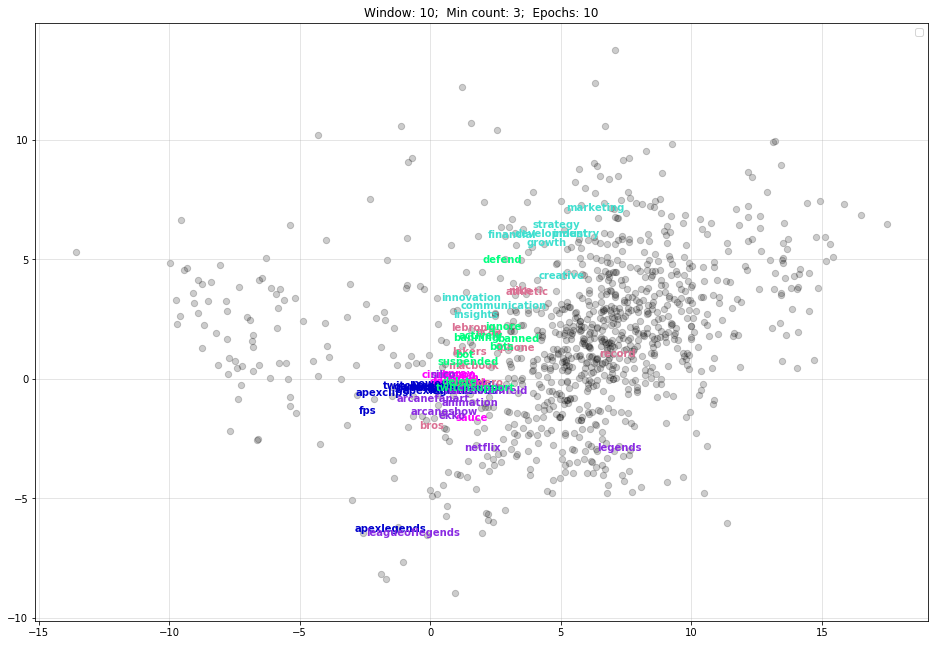

20 twitter_models\word2vec_10-window_3-min_15-epochs.model


No handles with labels found to put in legend.


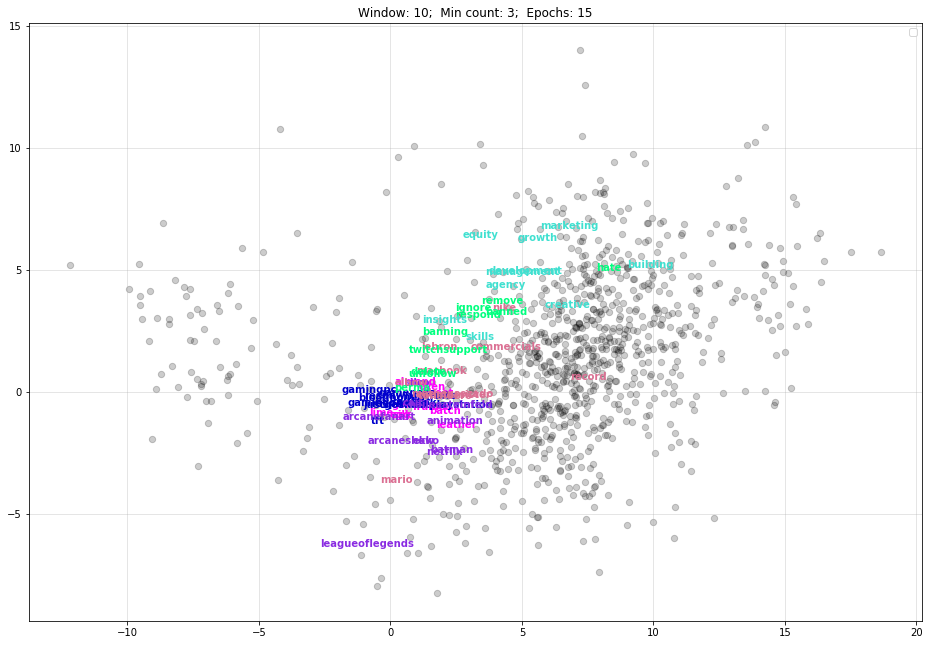

21 twitter_models\word2vec_10-window_3-min_5-epochs.model


No handles with labels found to put in legend.


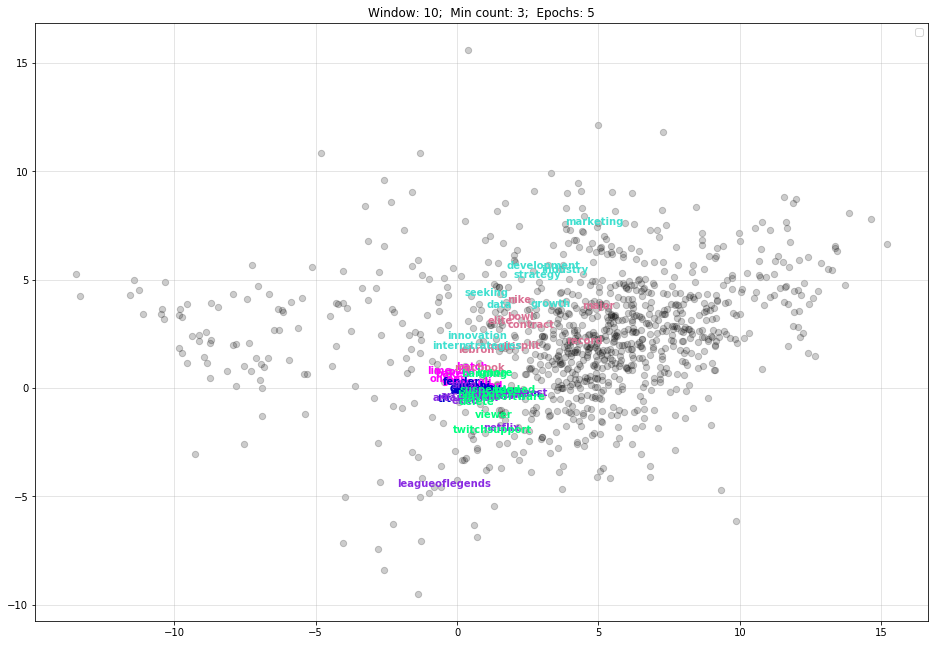

22 twitter_models\word2vec_10-window_4-min_10-epochs.model


No handles with labels found to put in legend.


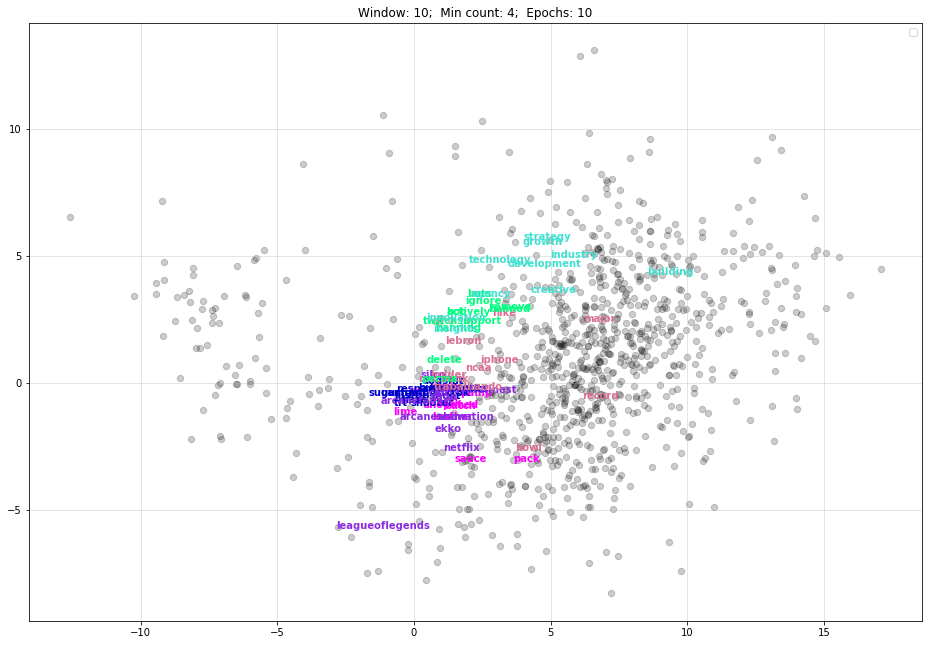

23 twitter_models\word2vec_10-window_4-min_15-epochs.model


No handles with labels found to put in legend.


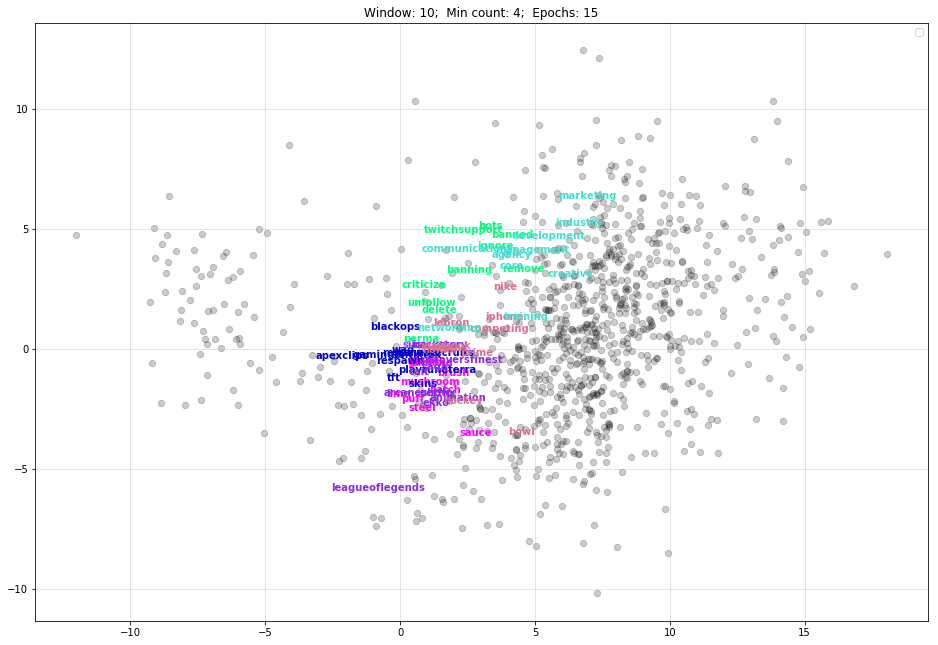

24 twitter_models\word2vec_10-window_4-min_5-epochs.model


No handles with labels found to put in legend.


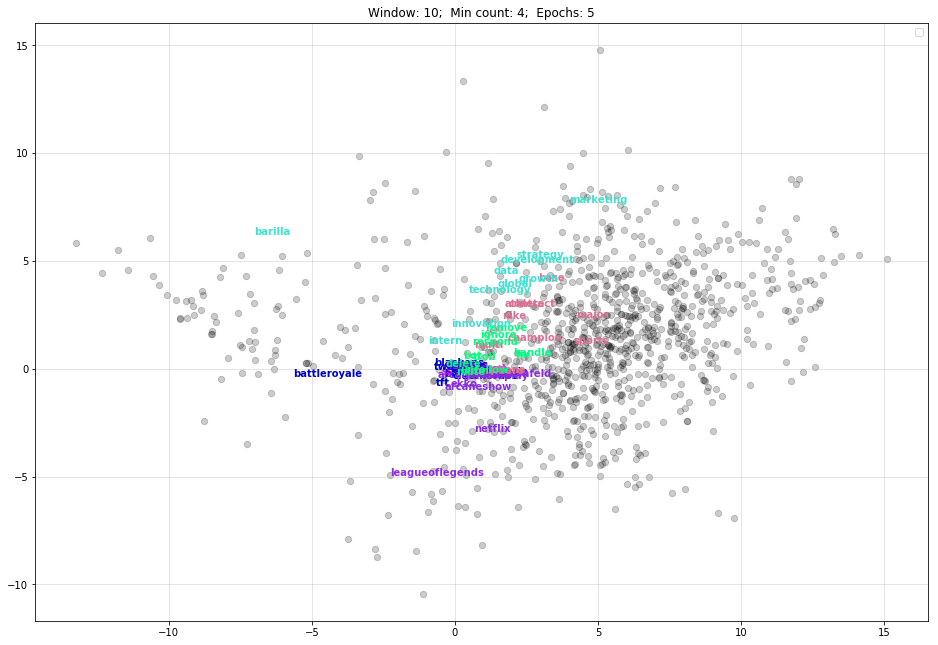

25 twitter_models\word2vec_5-window_2-min_10-epochs.model


No handles with labels found to put in legend.


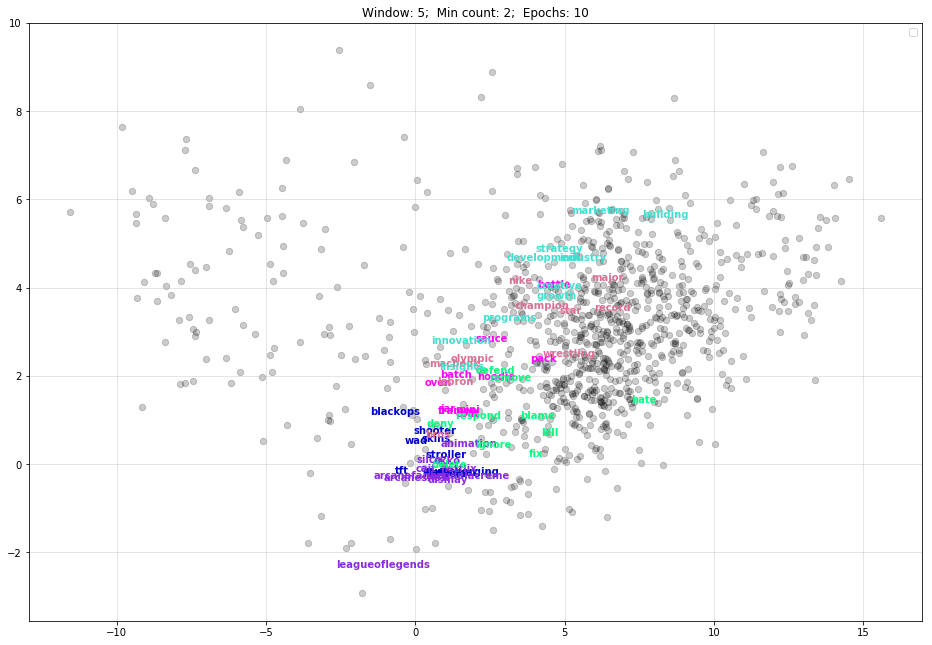

26 twitter_models\word2vec_5-window_2-min_10-epochs.model.syn1neg.npy
27 twitter_models\word2vec_5-window_2-min_10-epochs.model.wv.vectors.npy
28 twitter_models\word2vec_5-window_2-min_15-epochs.model


No handles with labels found to put in legend.


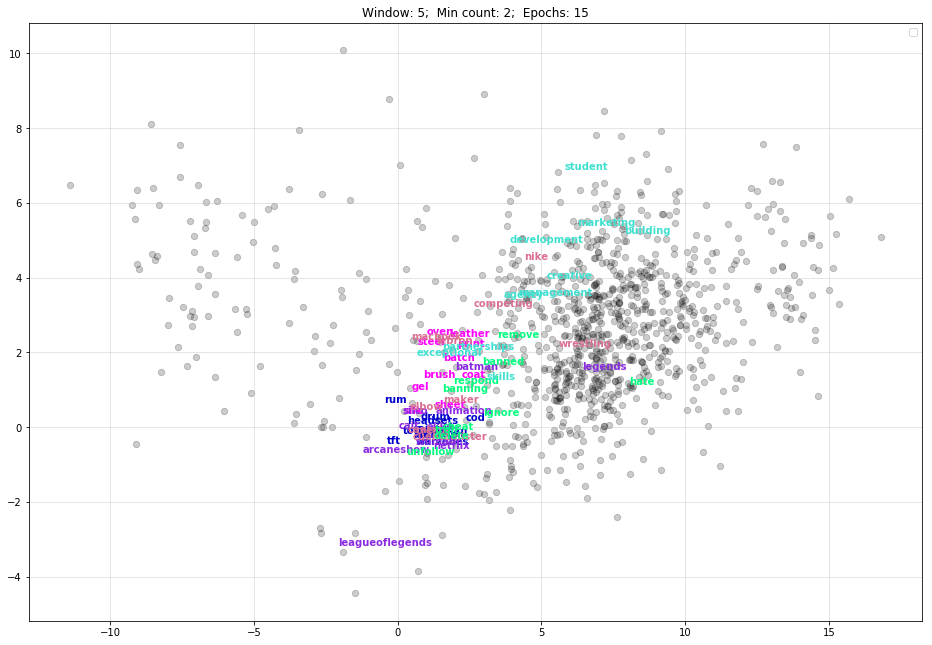

29 twitter_models\word2vec_5-window_2-min_15-epochs.model.syn1neg.npy
30 twitter_models\word2vec_5-window_2-min_15-epochs.model.wv.vectors.npy
31 twitter_models\word2vec_5-window_2-min_5-epochs.model


No handles with labels found to put in legend.


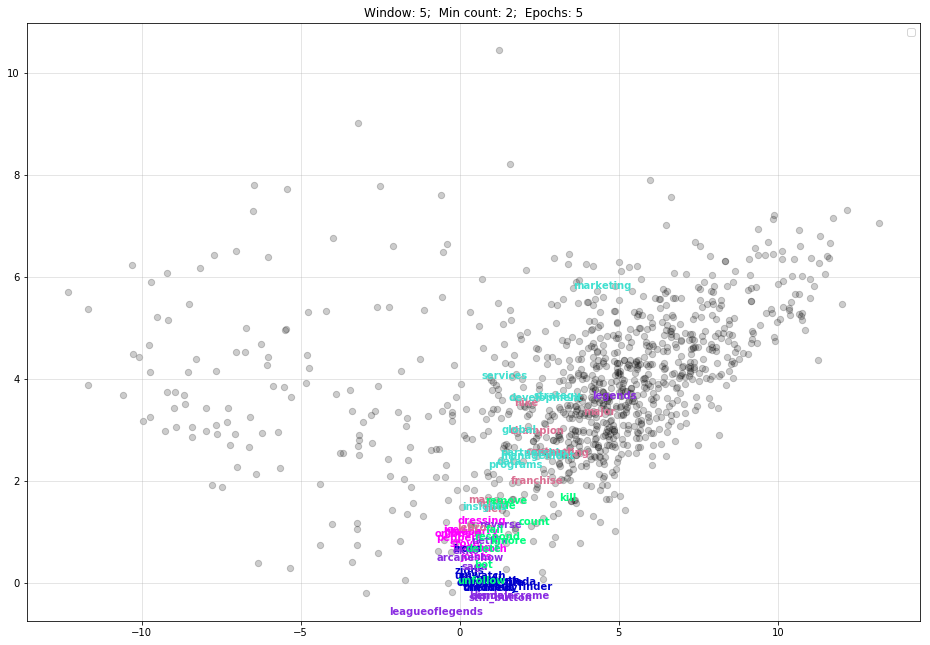

32 twitter_models\word2vec_5-window_2-min_5-epochs.model.syn1neg.npy
33 twitter_models\word2vec_5-window_2-min_5-epochs.model.wv.vectors.npy
34 twitter_models\word2vec_5-window_3-min_10-epochs.model


No handles with labels found to put in legend.


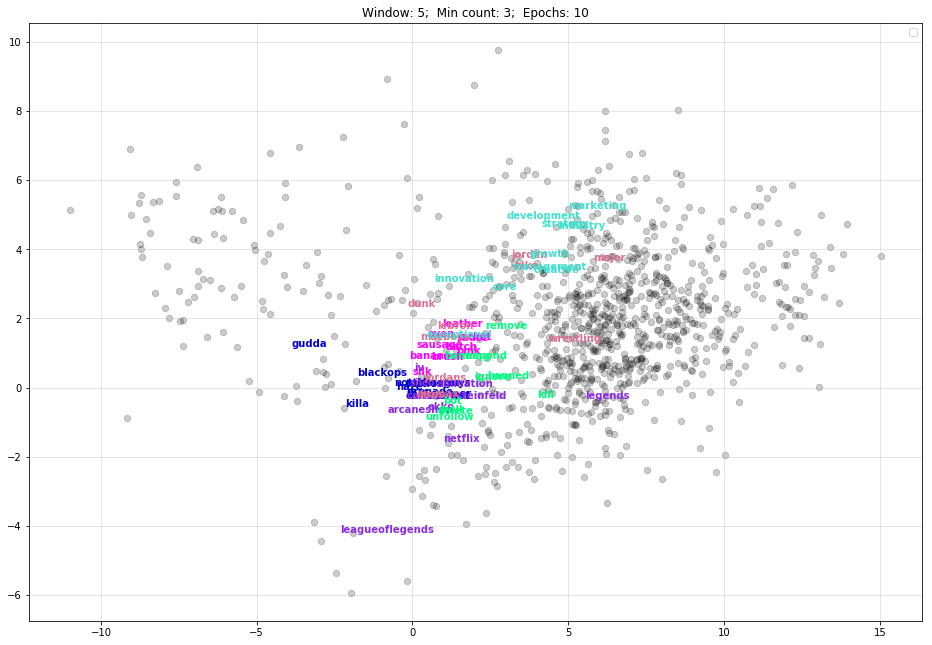

35 twitter_models\word2vec_5-window_3-min_15-epochs.model


No handles with labels found to put in legend.


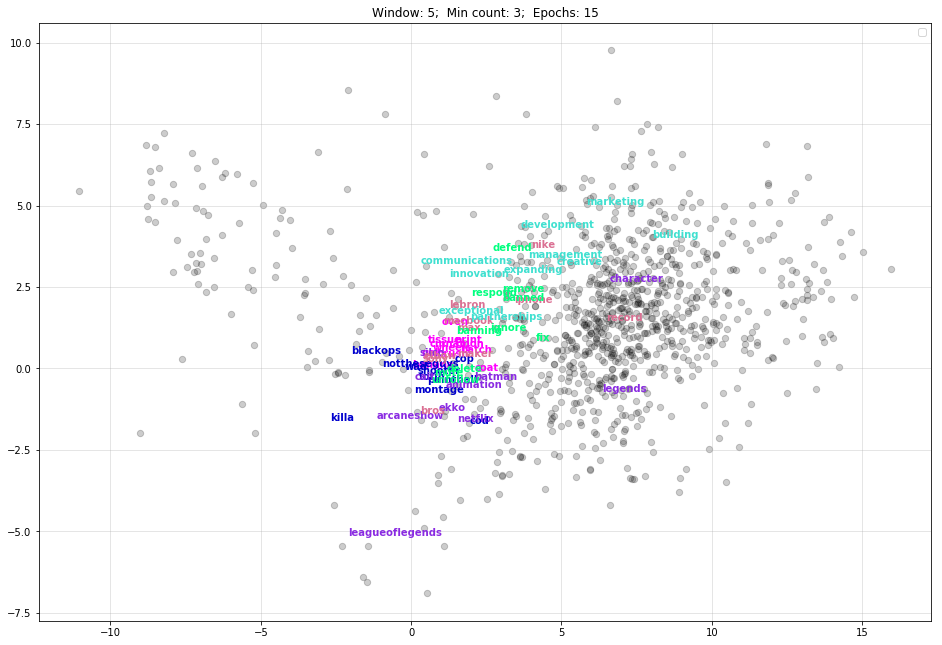

36 twitter_models\word2vec_5-window_3-min_5-epochs.model


No handles with labels found to put in legend.


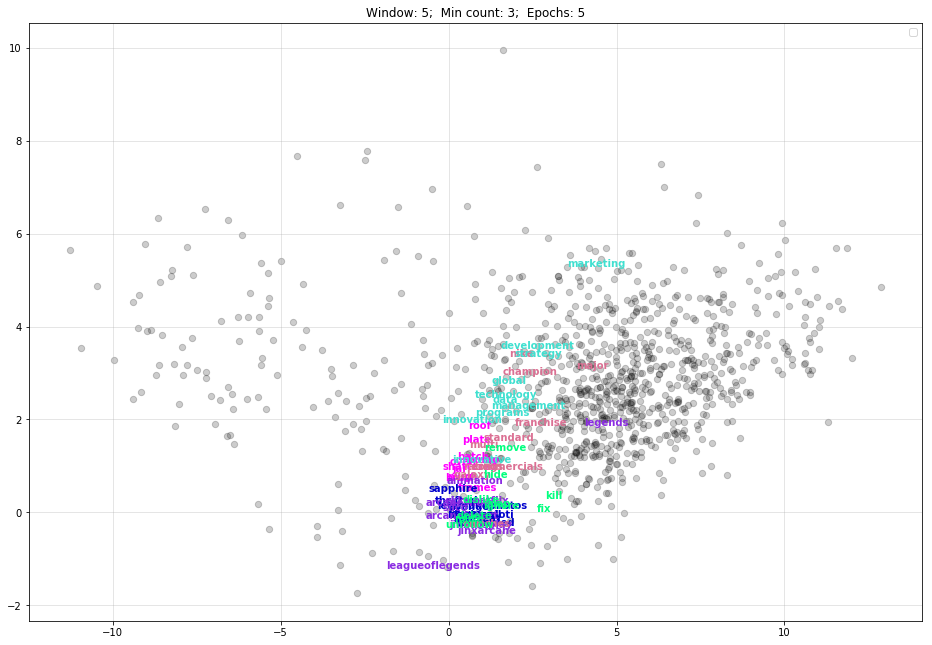

37 twitter_models\word2vec_5-window_4-min_10-epochs.model


No handles with labels found to put in legend.


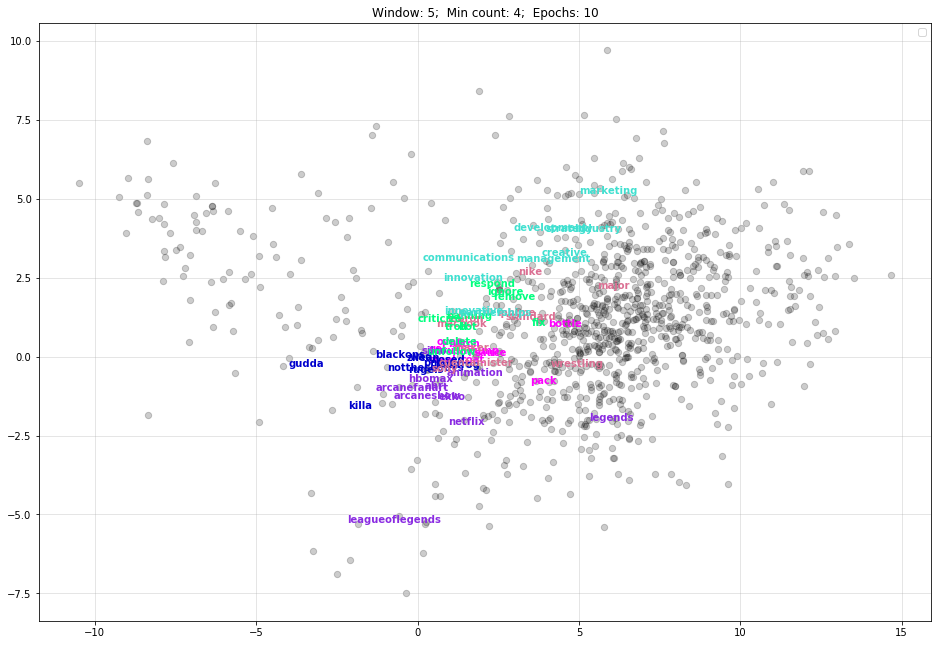

38 twitter_models\word2vec_5-window_4-min_15-epochs.model


No handles with labels found to put in legend.


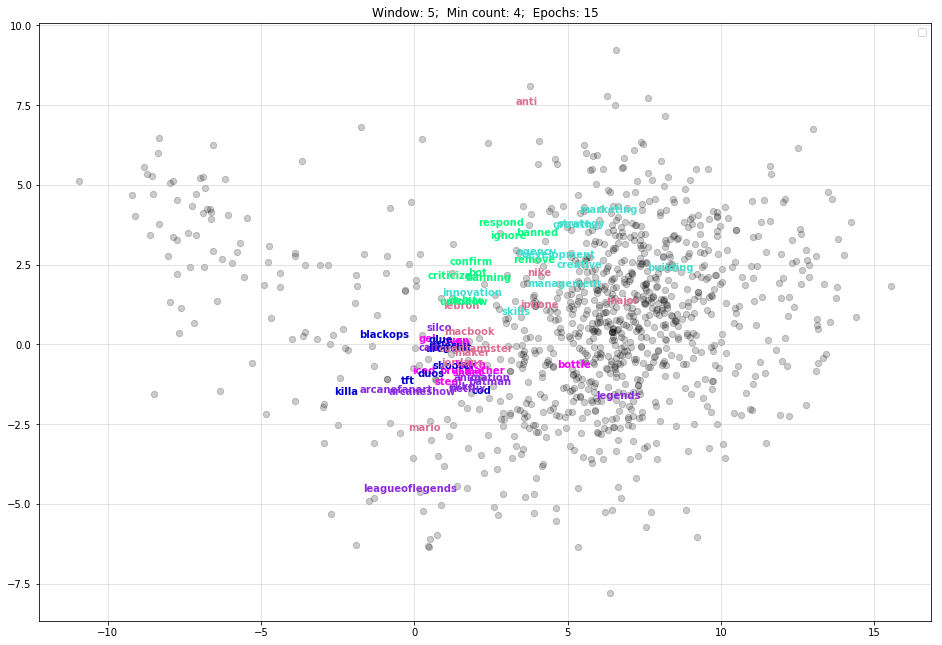

39 twitter_models\word2vec_5-window_4-min_5-epochs.model


No handles with labels found to put in legend.


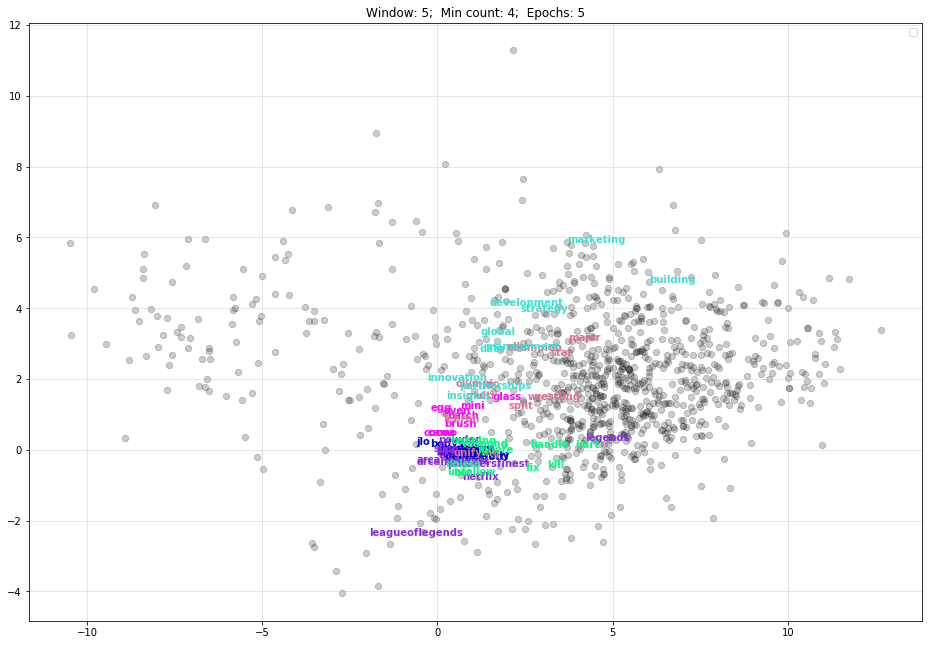

40 twitter_models\word2vec_6-window_2-min_10-epochs.model


No handles with labels found to put in legend.


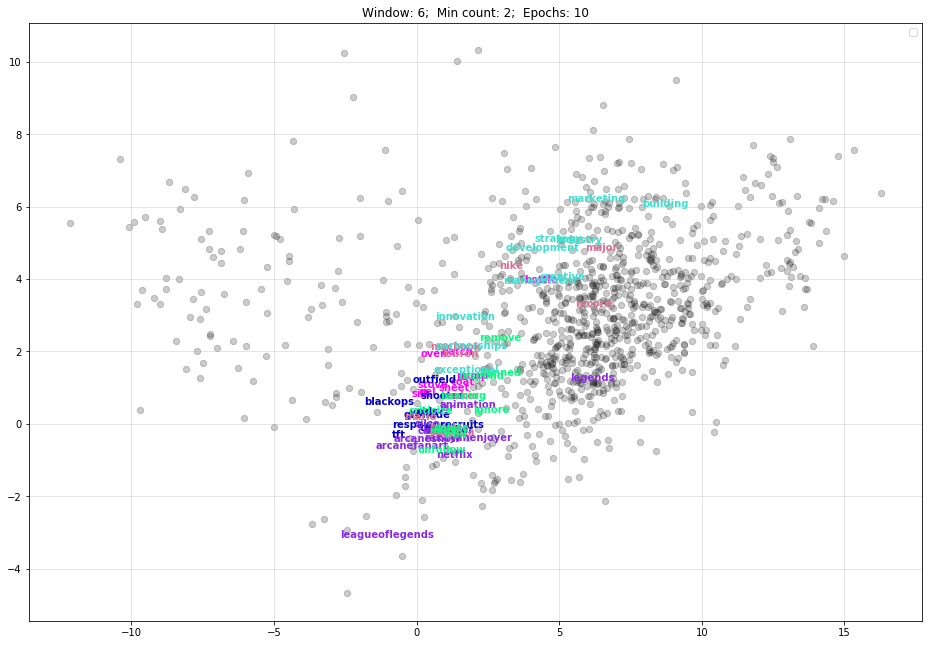

41 twitter_models\word2vec_6-window_2-min_10-epochs.model.syn1neg.npy
42 twitter_models\word2vec_6-window_2-min_10-epochs.model.wv.vectors.npy
43 twitter_models\word2vec_6-window_2-min_15-epochs.model


No handles with labels found to put in legend.


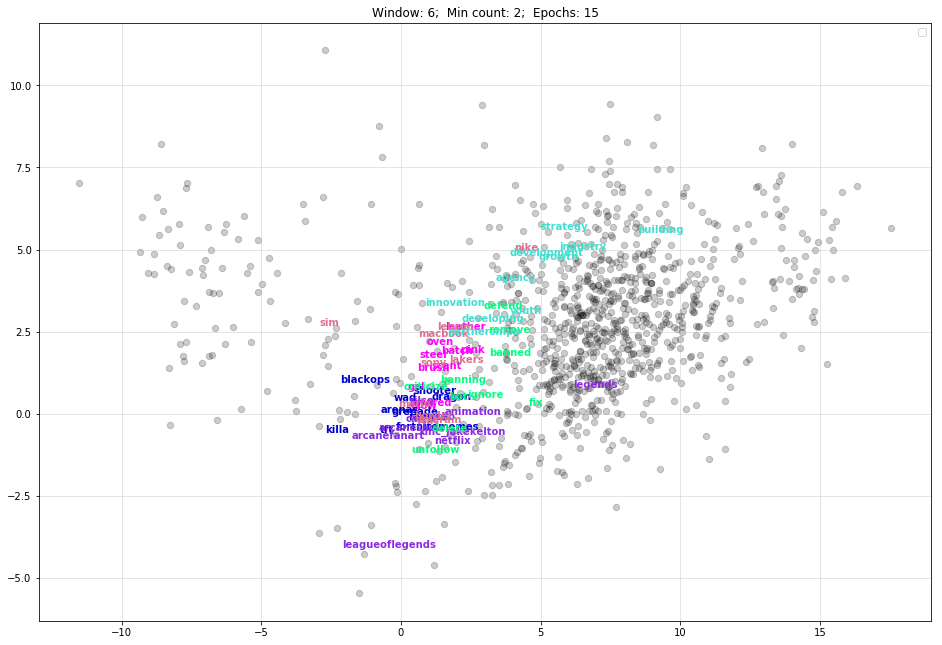

44 twitter_models\word2vec_6-window_2-min_15-epochs.model.syn1neg.npy
45 twitter_models\word2vec_6-window_2-min_15-epochs.model.wv.vectors.npy
46 twitter_models\word2vec_6-window_2-min_5-epochs.model


No handles with labels found to put in legend.


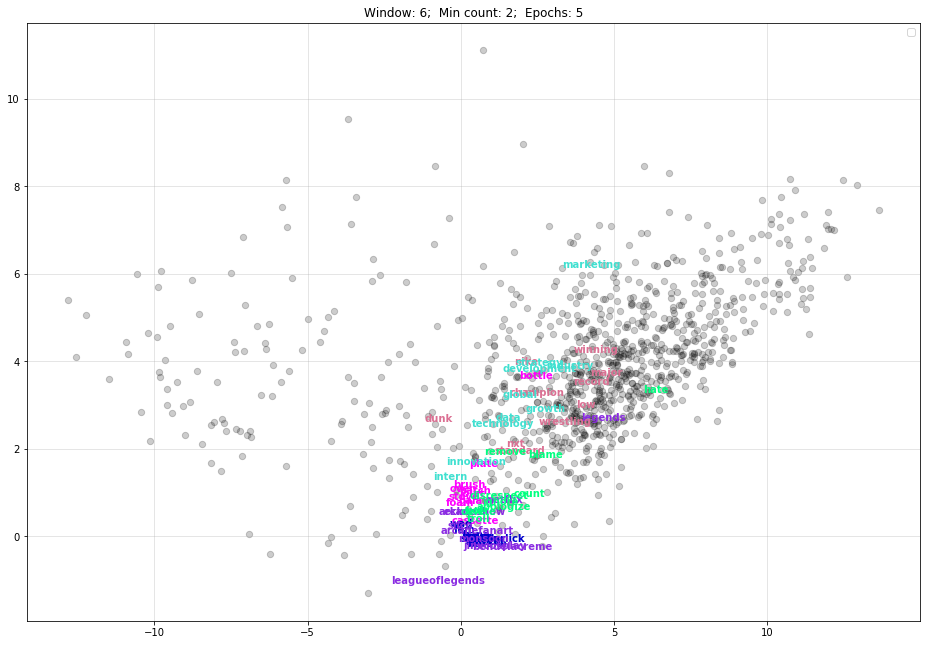

47 twitter_models\word2vec_6-window_2-min_5-epochs.model.syn1neg.npy
48 twitter_models\word2vec_6-window_2-min_5-epochs.model.wv.vectors.npy
49 twitter_models\word2vec_6-window_3-min_10-epochs.model


No handles with labels found to put in legend.


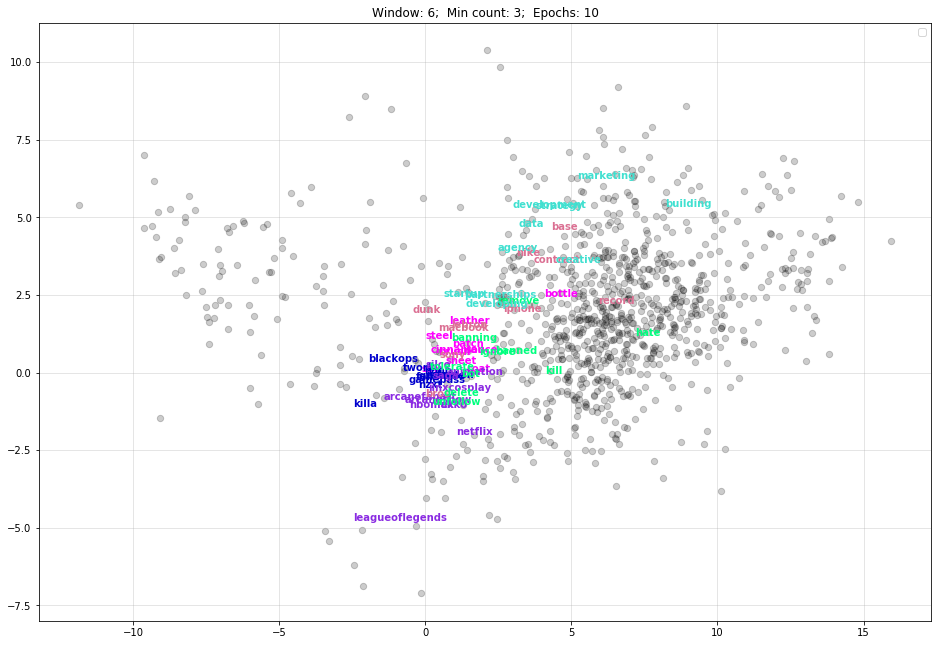

50 twitter_models\word2vec_6-window_3-min_15-epochs.model


No handles with labels found to put in legend.


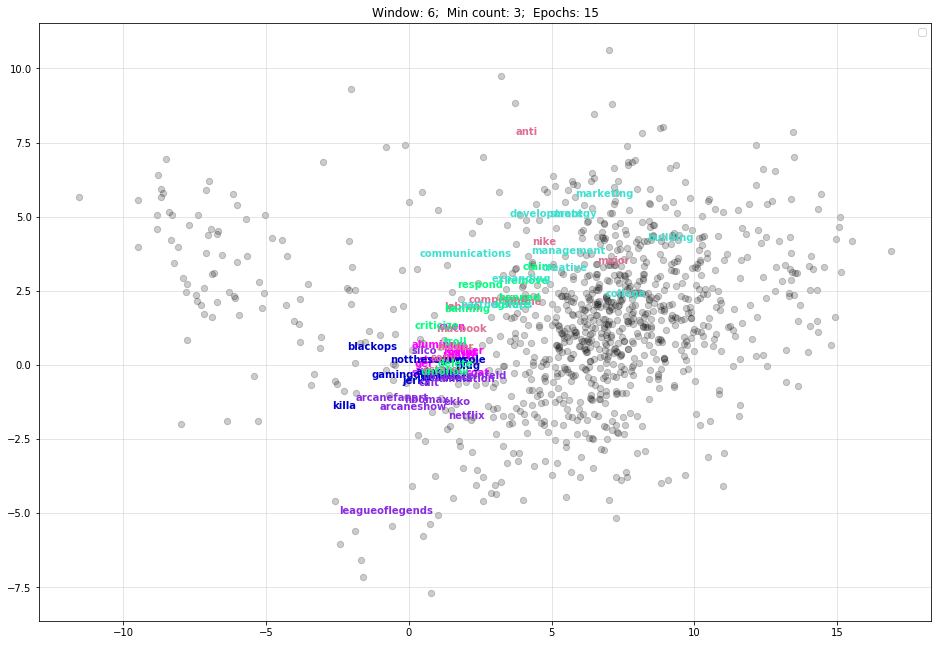

51 twitter_models\word2vec_6-window_3-min_5-epochs.model


No handles with labels found to put in legend.


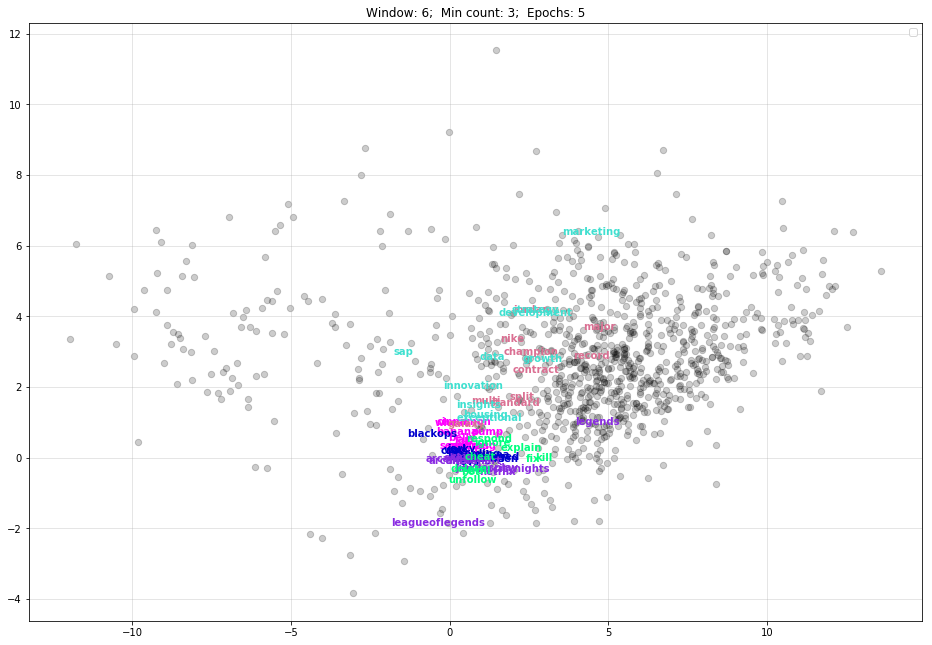

52 twitter_models\word2vec_6-window_4-min_10-epochs.model


No handles with labels found to put in legend.


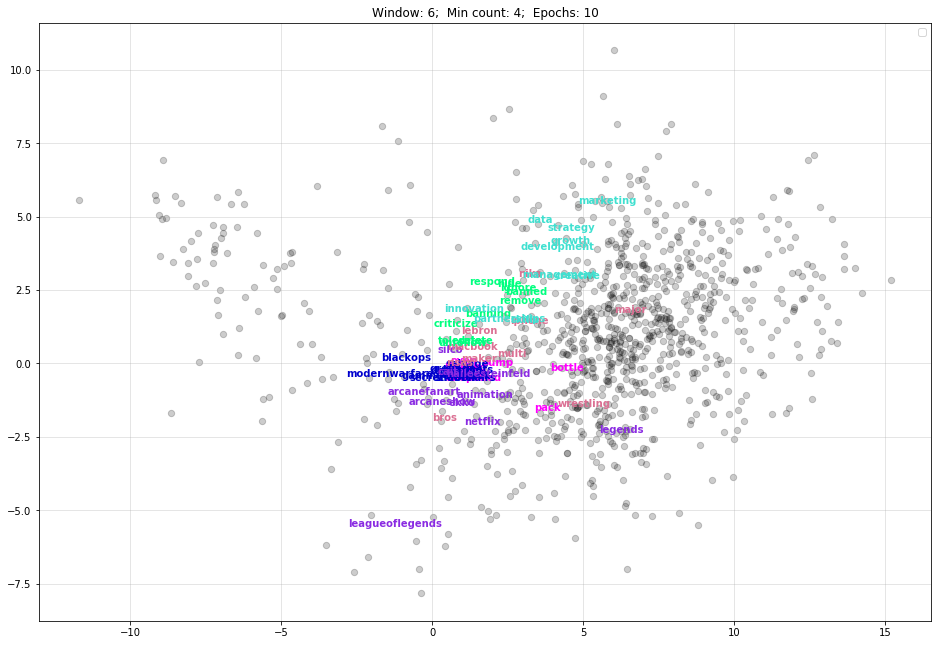

53 twitter_models\word2vec_6-window_4-min_15-epochs.model


No handles with labels found to put in legend.


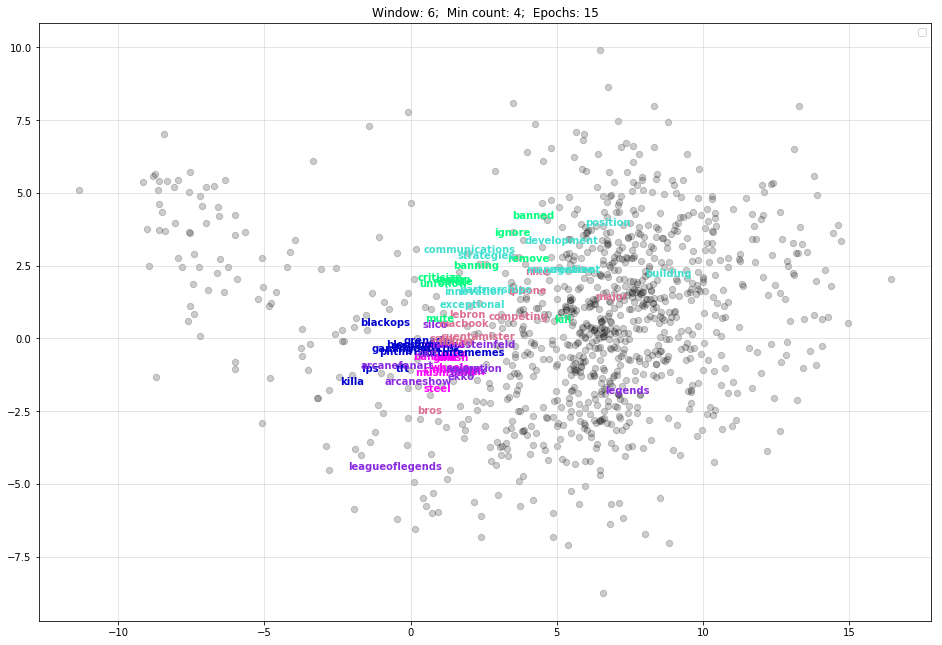

54 twitter_models\word2vec_6-window_4-min_5-epochs.model


No handles with labels found to put in legend.


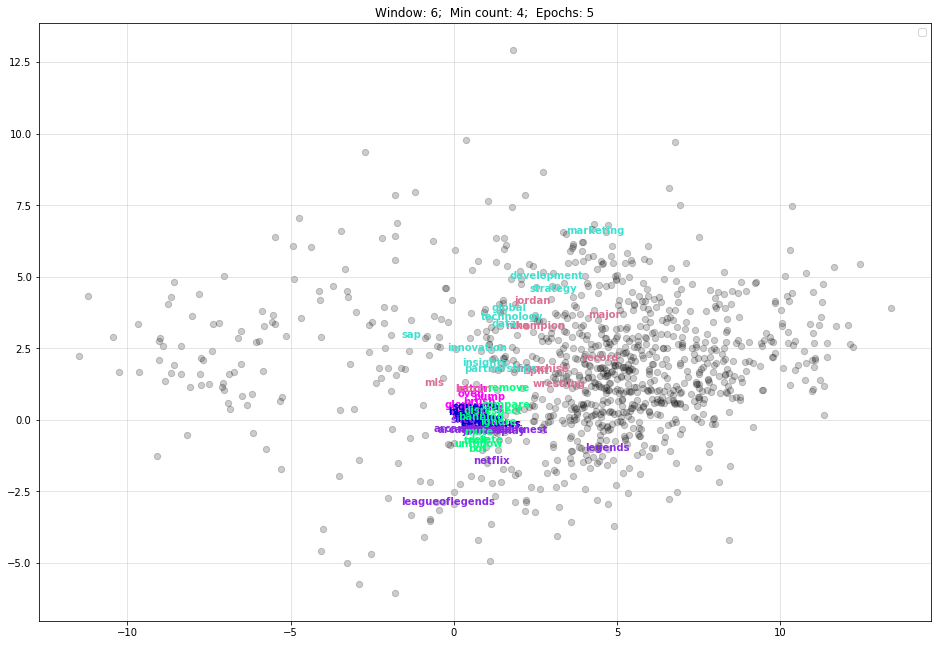

55 twitter_models\word2vec_7-window_2-min_10-epochs.model


No handles with labels found to put in legend.


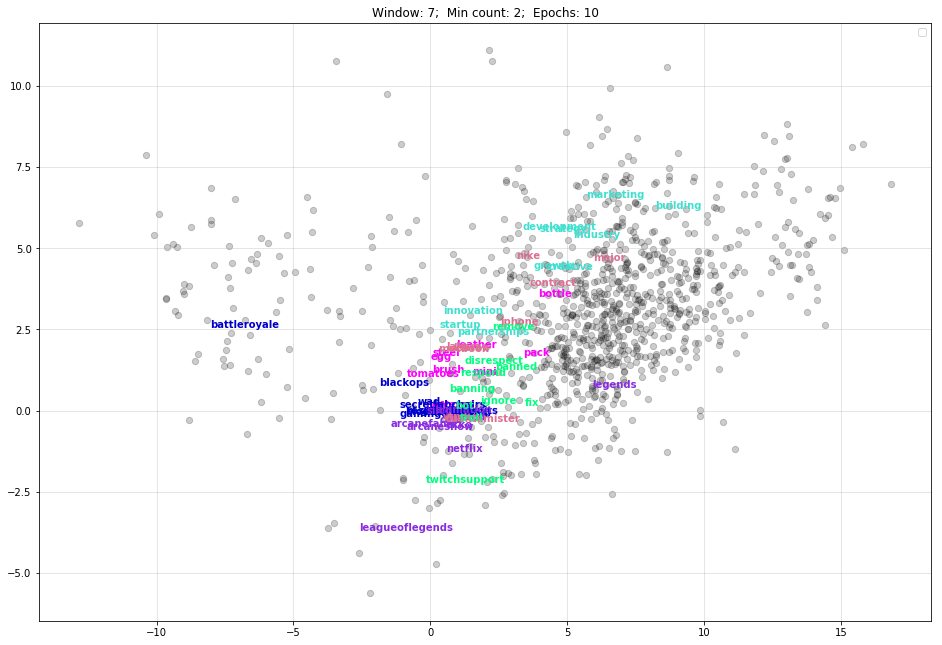

56 twitter_models\word2vec_7-window_2-min_10-epochs.model.syn1neg.npy
57 twitter_models\word2vec_7-window_2-min_10-epochs.model.wv.vectors.npy
58 twitter_models\word2vec_7-window_2-min_15-epochs.model


No handles with labels found to put in legend.


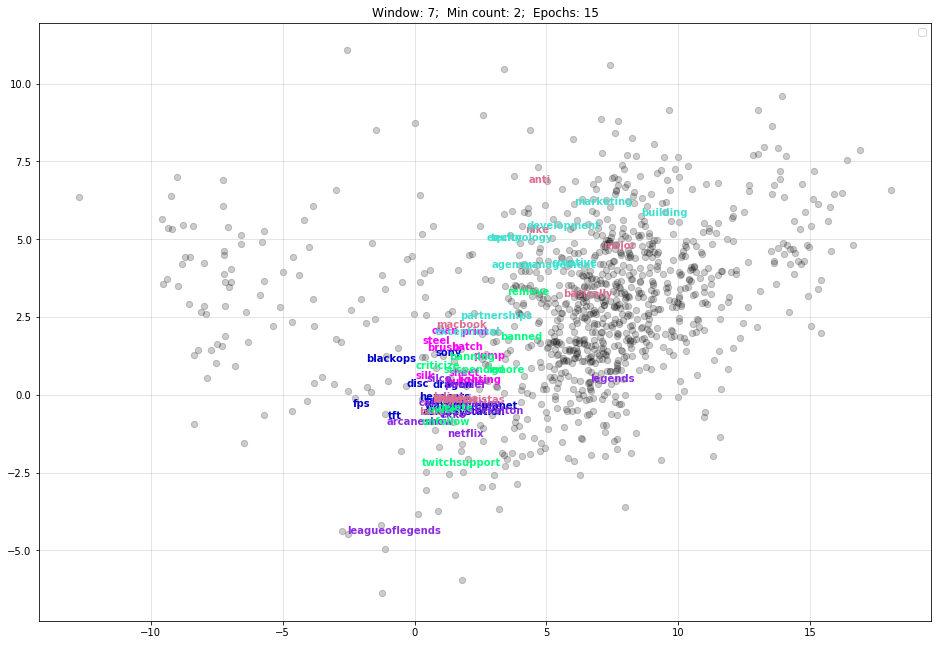

59 twitter_models\word2vec_7-window_2-min_15-epochs.model.syn1neg.npy
60 twitter_models\word2vec_7-window_2-min_15-epochs.model.wv.vectors.npy
61 twitter_models\word2vec_7-window_2-min_5-epochs.model


No handles with labels found to put in legend.


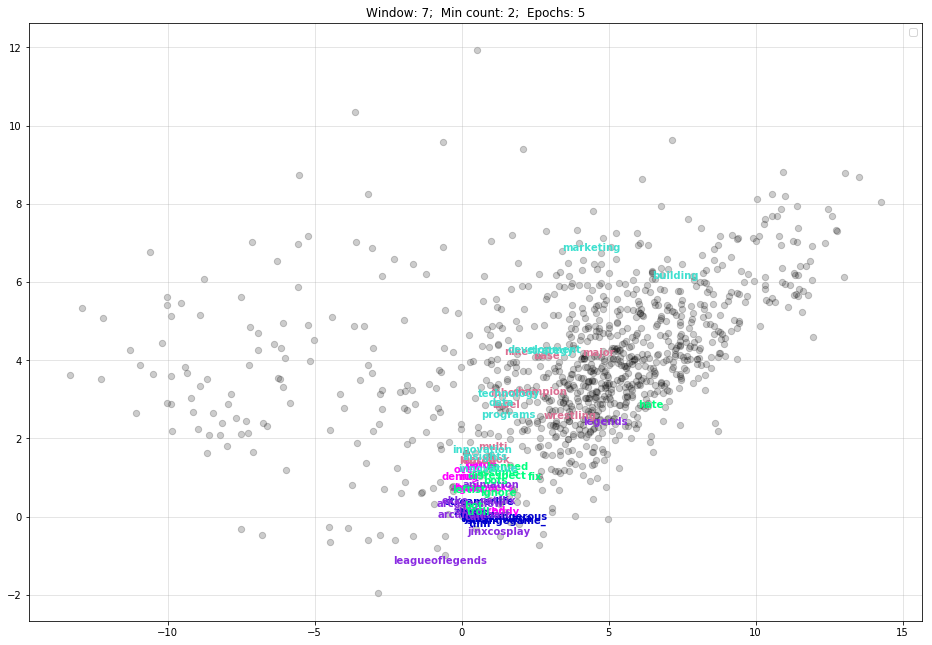

62 twitter_models\word2vec_7-window_2-min_5-epochs.model.syn1neg.npy
63 twitter_models\word2vec_7-window_2-min_5-epochs.model.wv.vectors.npy
64 twitter_models\word2vec_7-window_3-min_10-epochs.model


No handles with labels found to put in legend.


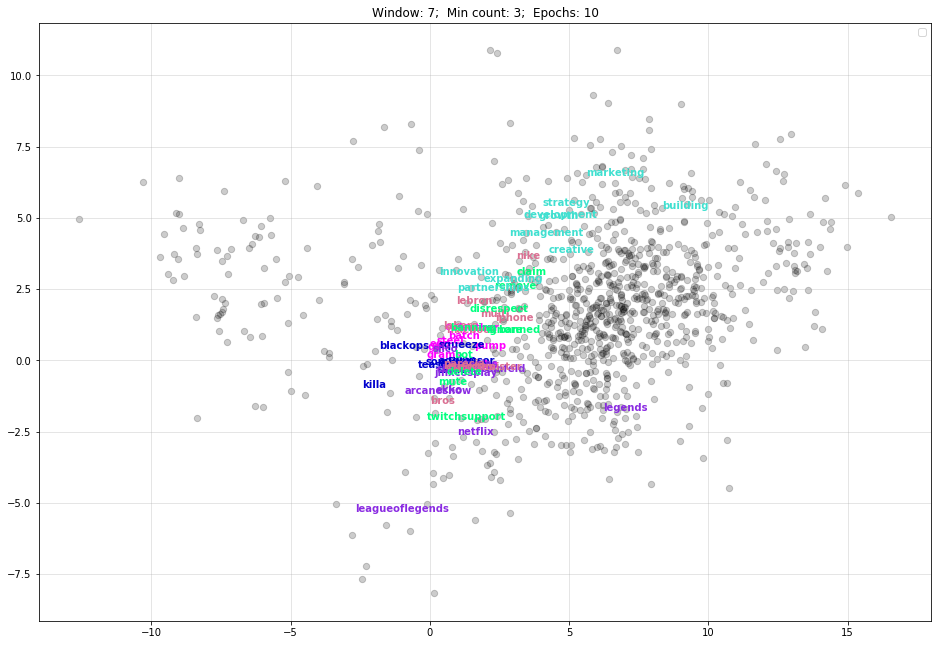

65 twitter_models\word2vec_7-window_3-min_15-epochs.model


No handles with labels found to put in legend.


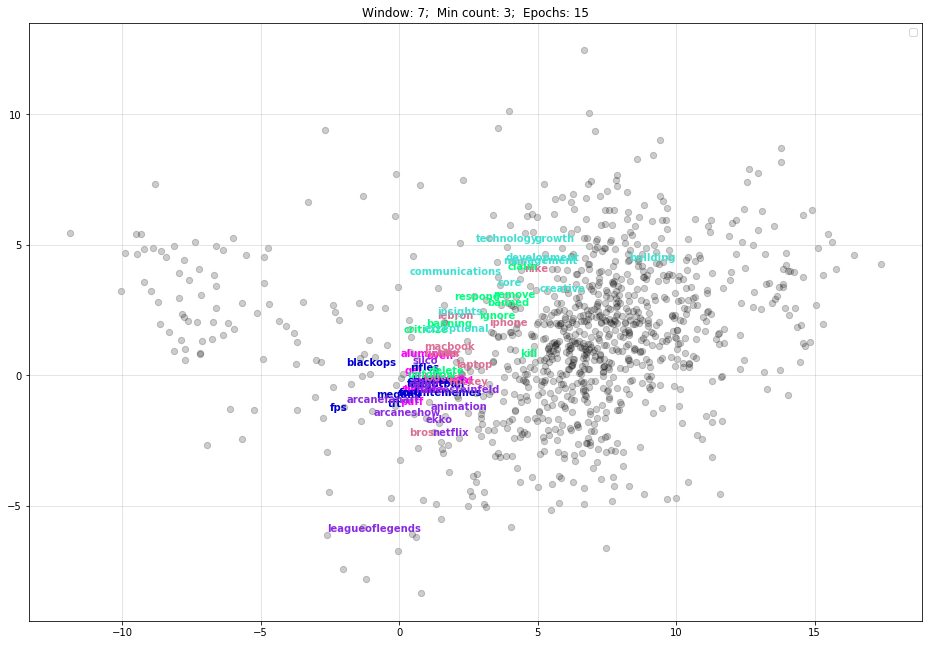

66 twitter_models\word2vec_7-window_3-min_5-epochs.model


No handles with labels found to put in legend.


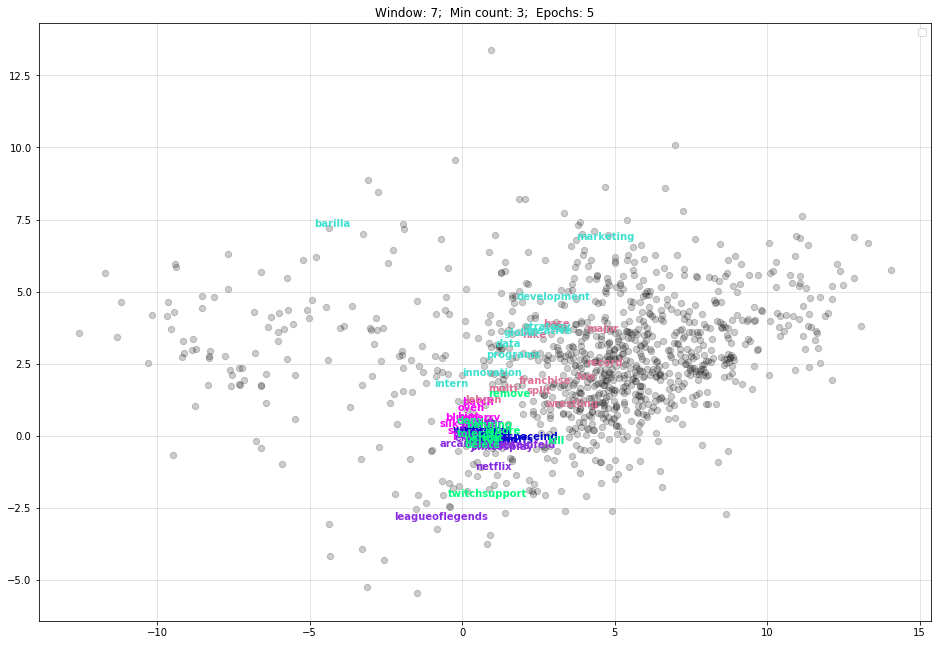

67 twitter_models\word2vec_7-window_4-min_10-epochs.model


No handles with labels found to put in legend.


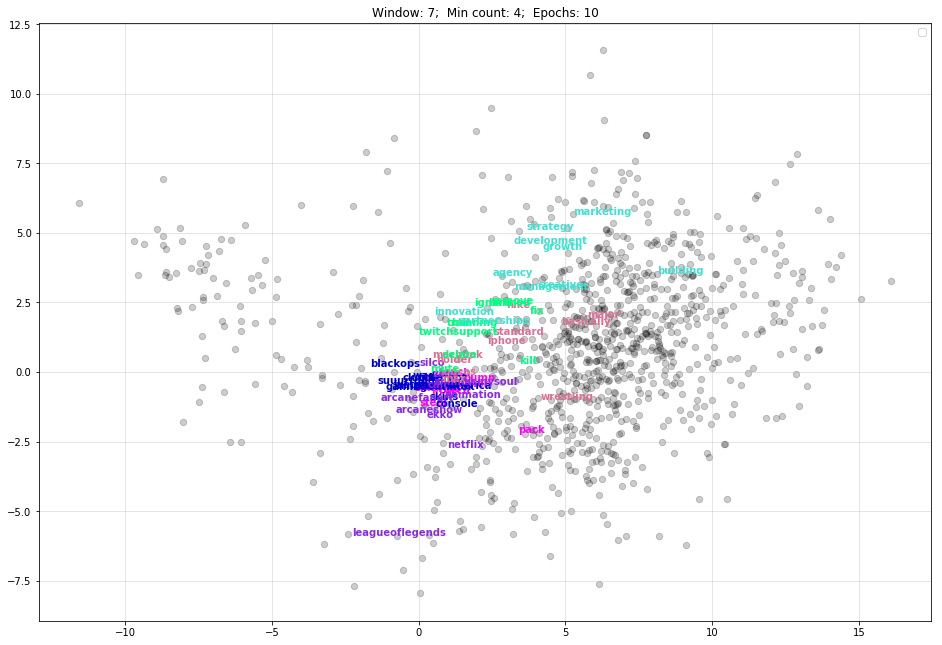

68 twitter_models\word2vec_7-window_4-min_15-epochs.model


No handles with labels found to put in legend.


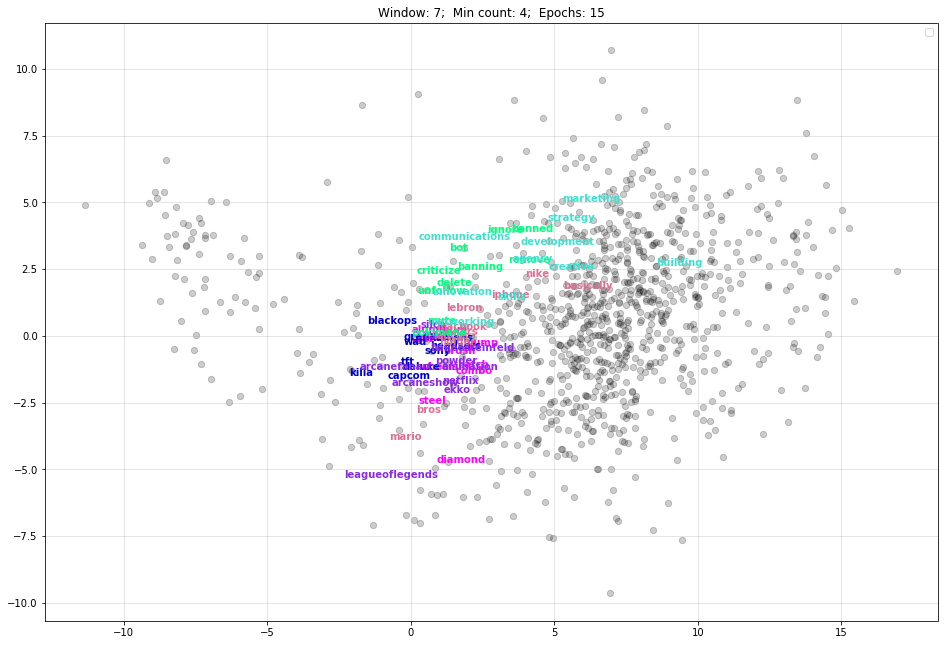

69 twitter_models\word2vec_7-window_4-min_5-epochs.model


No handles with labels found to put in legend.


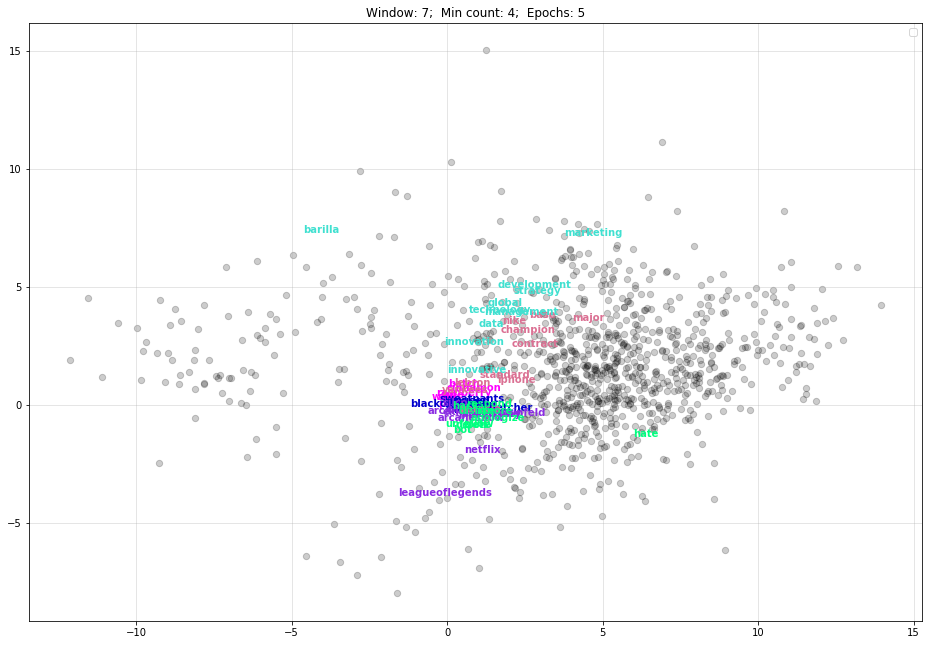

70 twitter_models\word2vec_8-window_2-min_10-epochs.model


No handles with labels found to put in legend.


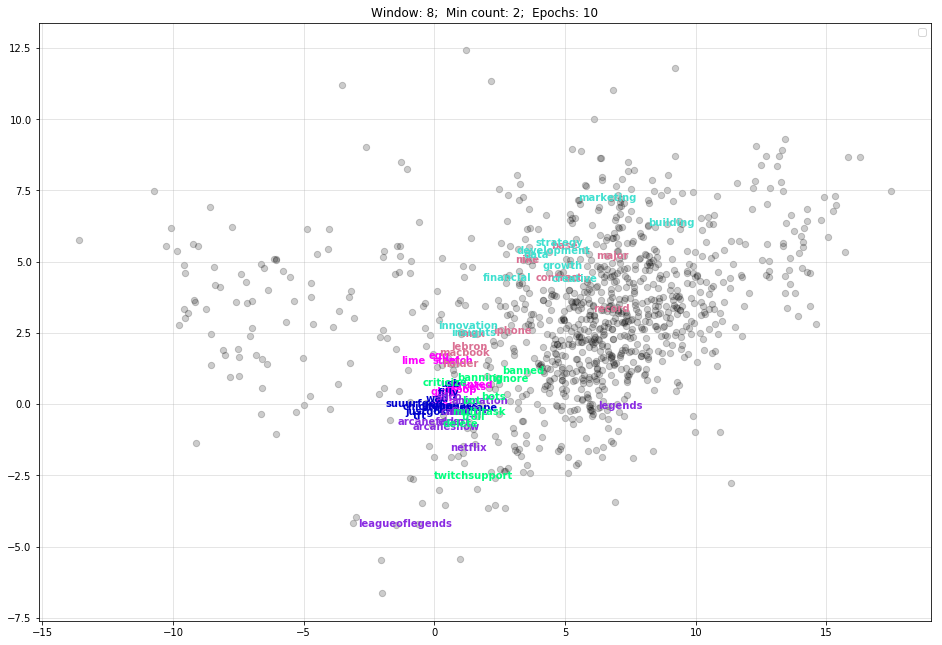

71 twitter_models\word2vec_8-window_2-min_10-epochs.model.syn1neg.npy
72 twitter_models\word2vec_8-window_2-min_10-epochs.model.wv.vectors.npy
73 twitter_models\word2vec_8-window_2-min_15-epochs.model


No handles with labels found to put in legend.


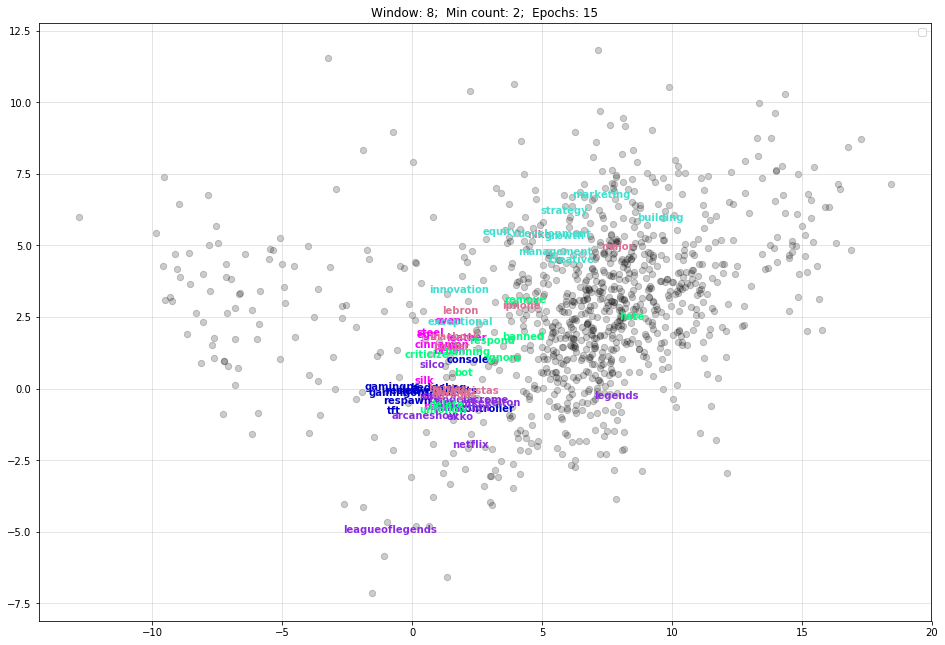

74 twitter_models\word2vec_8-window_2-min_15-epochs.model.syn1neg.npy
75 twitter_models\word2vec_8-window_2-min_15-epochs.model.wv.vectors.npy
76 twitter_models\word2vec_8-window_2-min_5-epochs.model


No handles with labels found to put in legend.


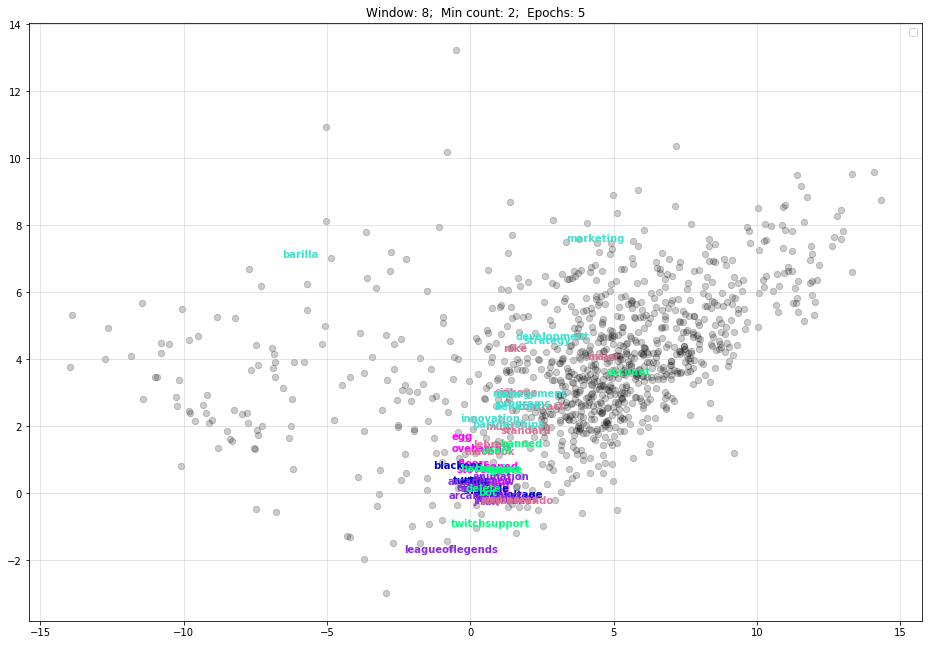

77 twitter_models\word2vec_8-window_2-min_5-epochs.model.syn1neg.npy
78 twitter_models\word2vec_8-window_2-min_5-epochs.model.wv.vectors.npy
79 twitter_models\word2vec_8-window_3-min_10-epochs.model


No handles with labels found to put in legend.


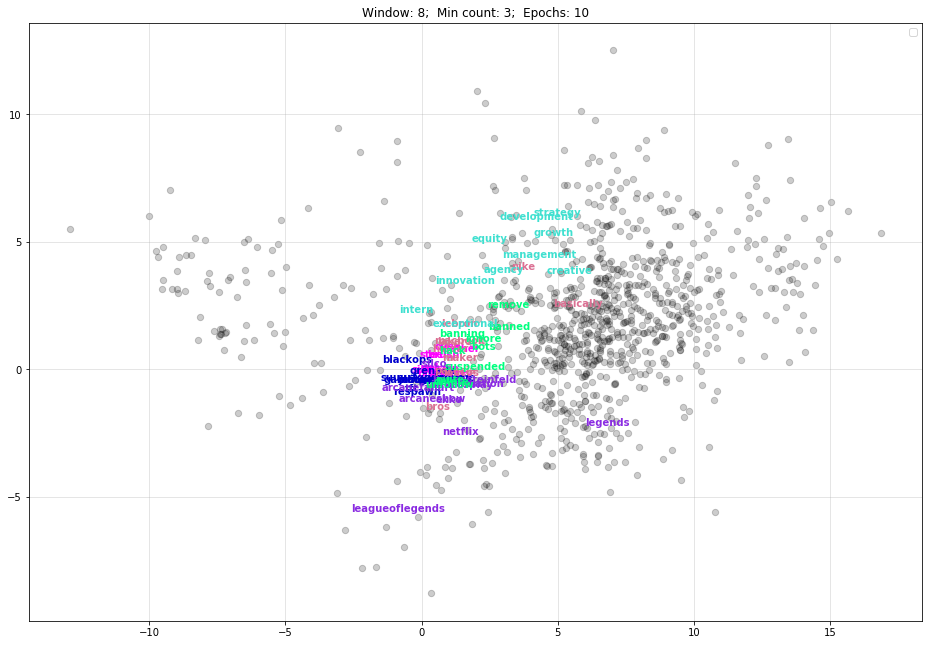

80 twitter_models\word2vec_8-window_3-min_15-epochs.model


No handles with labels found to put in legend.


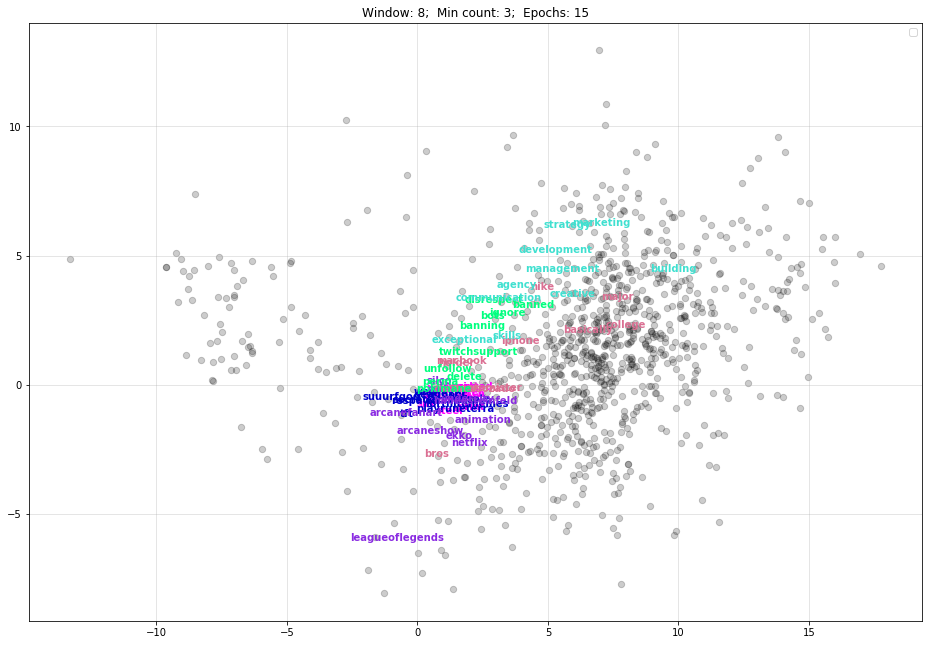

81 twitter_models\word2vec_8-window_3-min_5-epochs.model


No handles with labels found to put in legend.


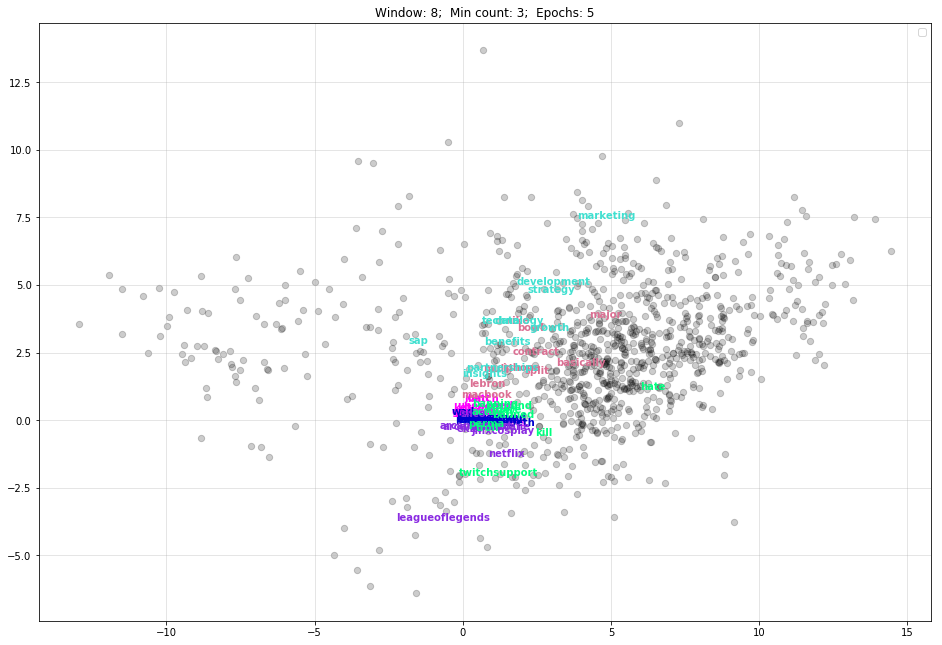

82 twitter_models\word2vec_8-window_4-min_10-epochs.model


No handles with labels found to put in legend.


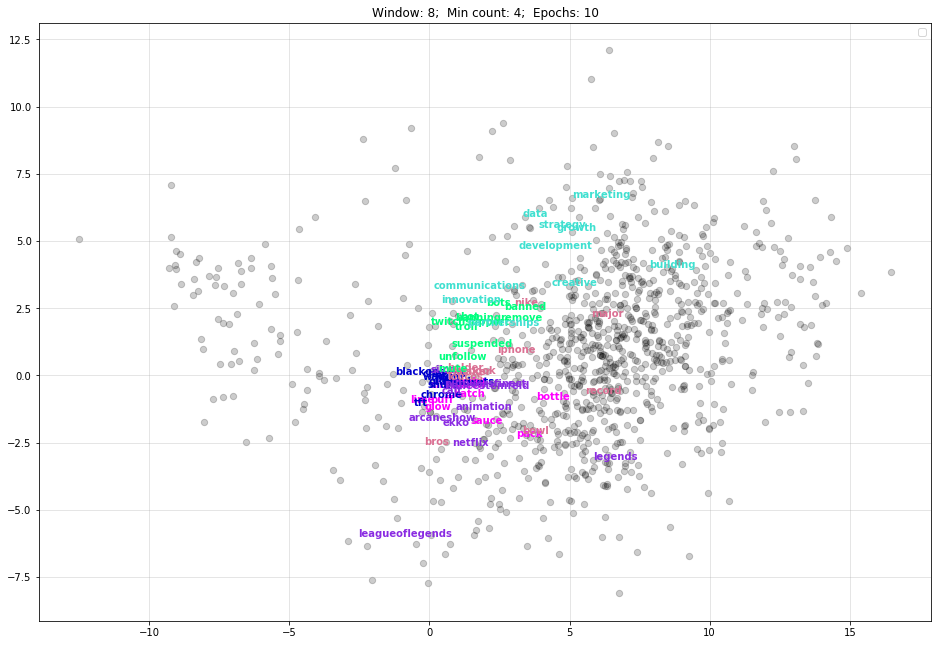

83 twitter_models\word2vec_8-window_4-min_15-epochs.model


No handles with labels found to put in legend.


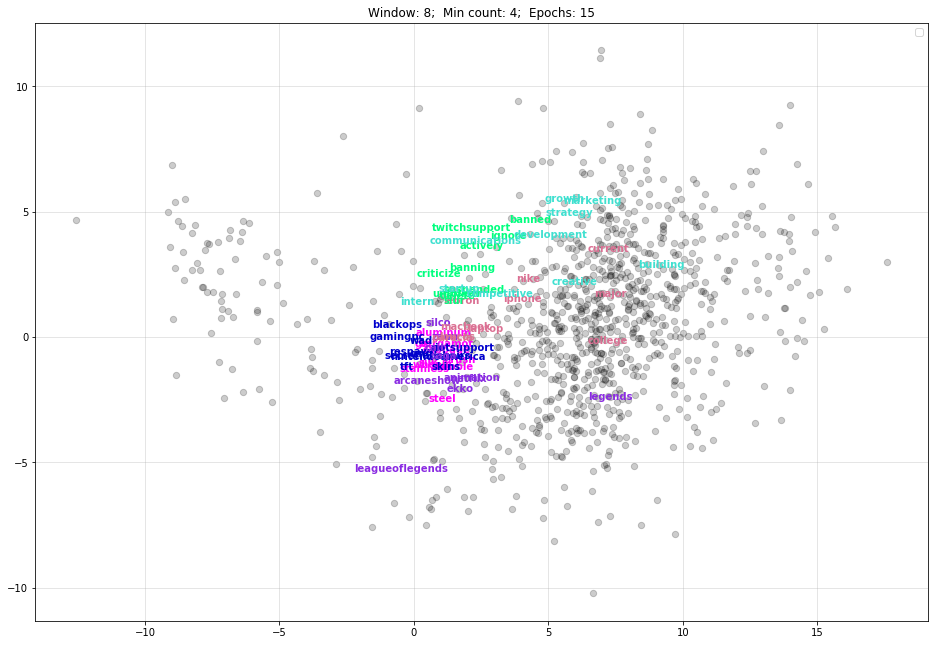

84 twitter_models\word2vec_8-window_4-min_5-epochs.model


No handles with labels found to put in legend.


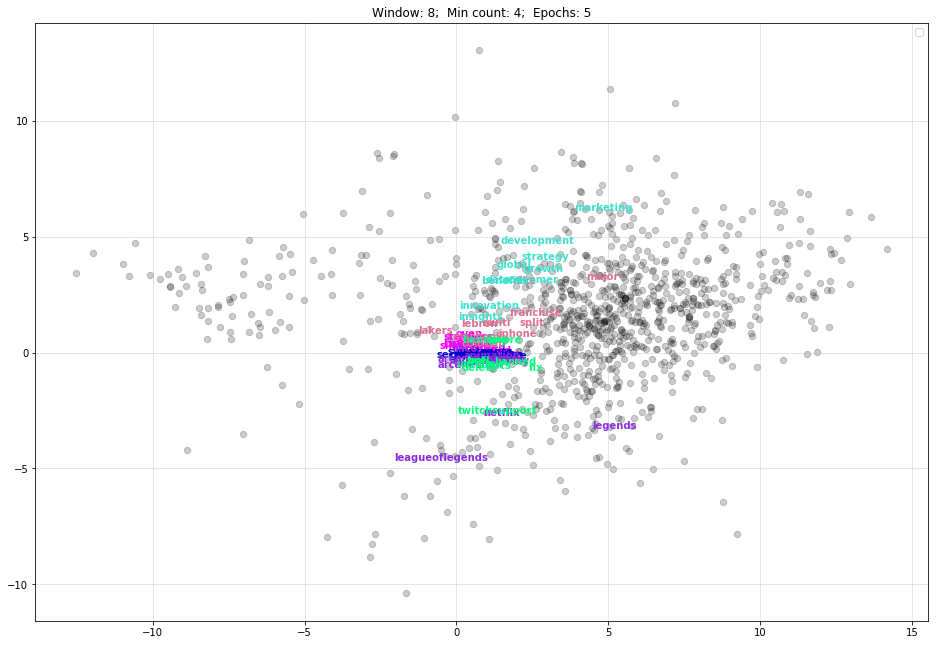

85 twitter_models\word2vec_9-window_2-min_10-epochs.model


No handles with labels found to put in legend.


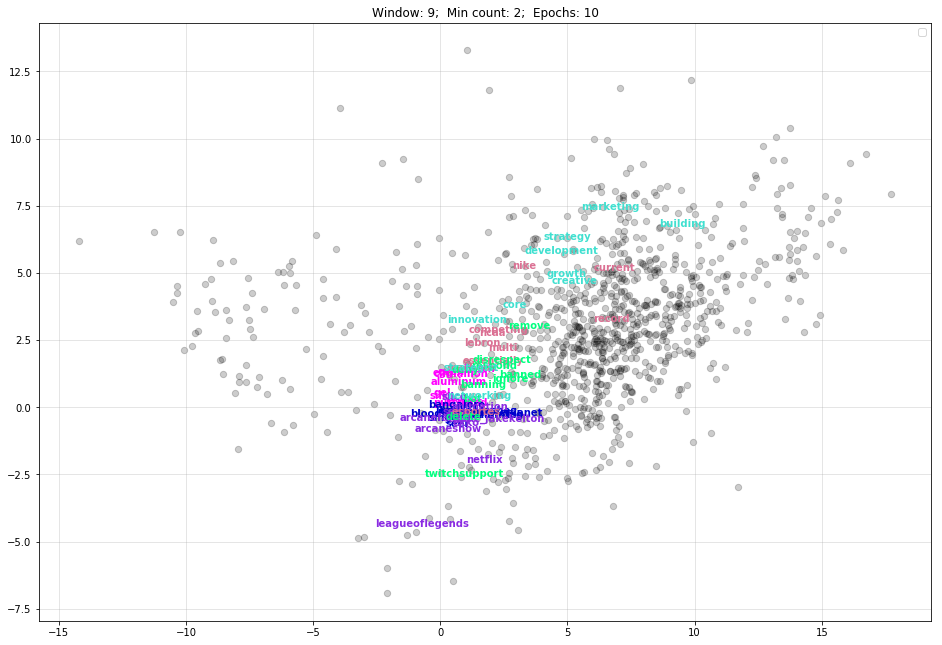

86 twitter_models\word2vec_9-window_2-min_10-epochs.model.syn1neg.npy
87 twitter_models\word2vec_9-window_2-min_10-epochs.model.wv.vectors.npy
88 twitter_models\word2vec_9-window_2-min_15-epochs.model


No handles with labels found to put in legend.


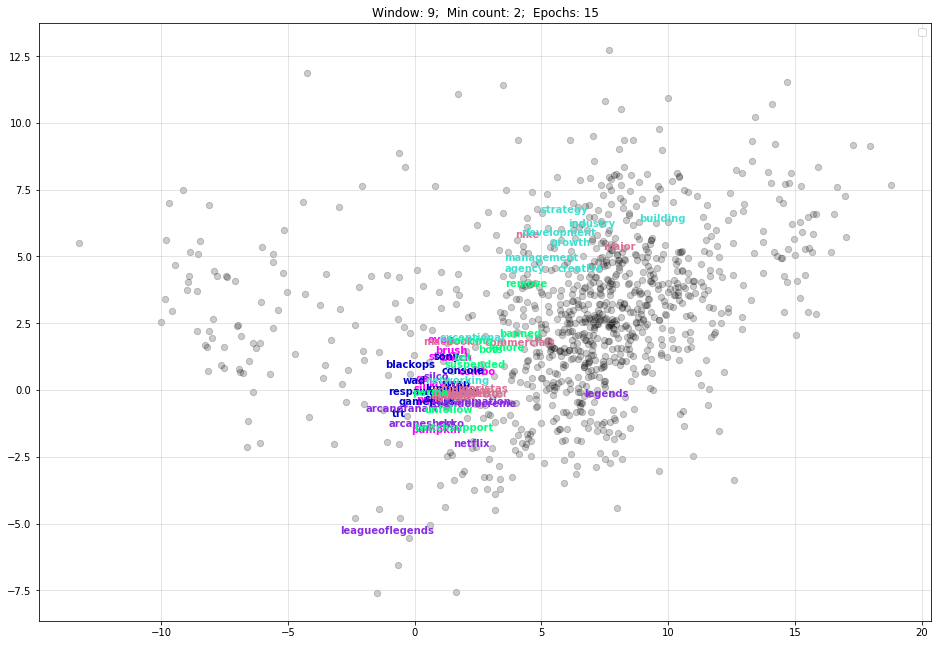

89 twitter_models\word2vec_9-window_2-min_15-epochs.model.syn1neg.npy
90 twitter_models\word2vec_9-window_2-min_15-epochs.model.wv.vectors.npy
91 twitter_models\word2vec_9-window_2-min_5-epochs.model


No handles with labels found to put in legend.


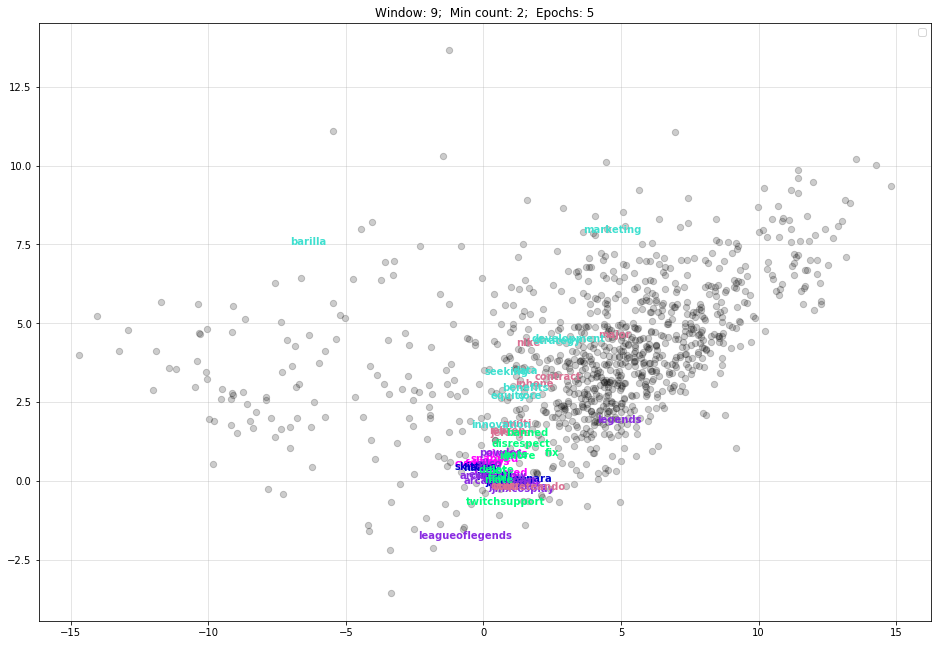

92 twitter_models\word2vec_9-window_2-min_5-epochs.model.syn1neg.npy
93 twitter_models\word2vec_9-window_2-min_5-epochs.model.wv.vectors.npy
94 twitter_models\word2vec_9-window_3-min_10-epochs.model


No handles with labels found to put in legend.


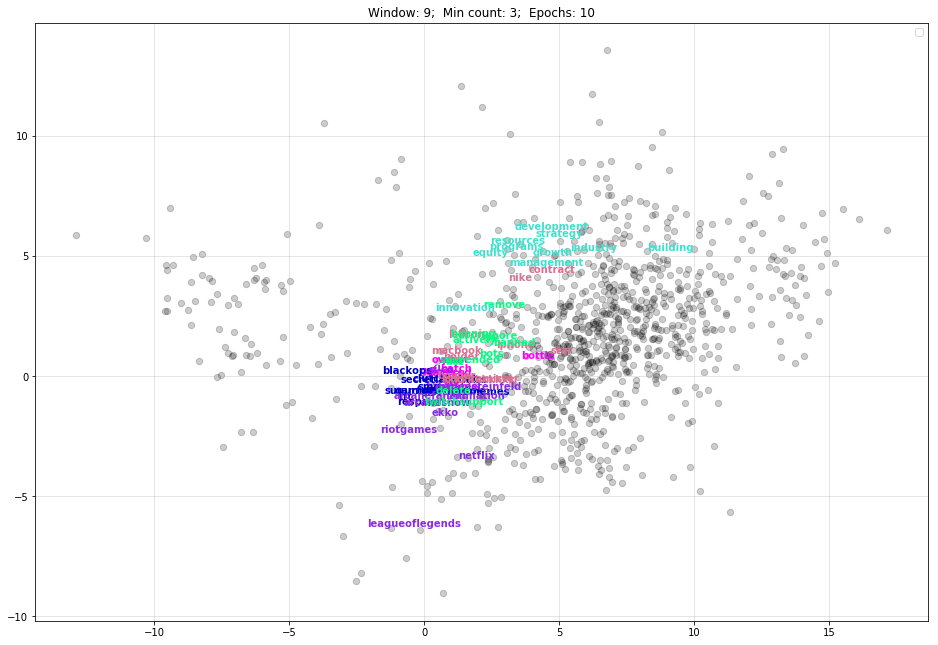

95 twitter_models\word2vec_9-window_3-min_15-epochs.model


No handles with labels found to put in legend.


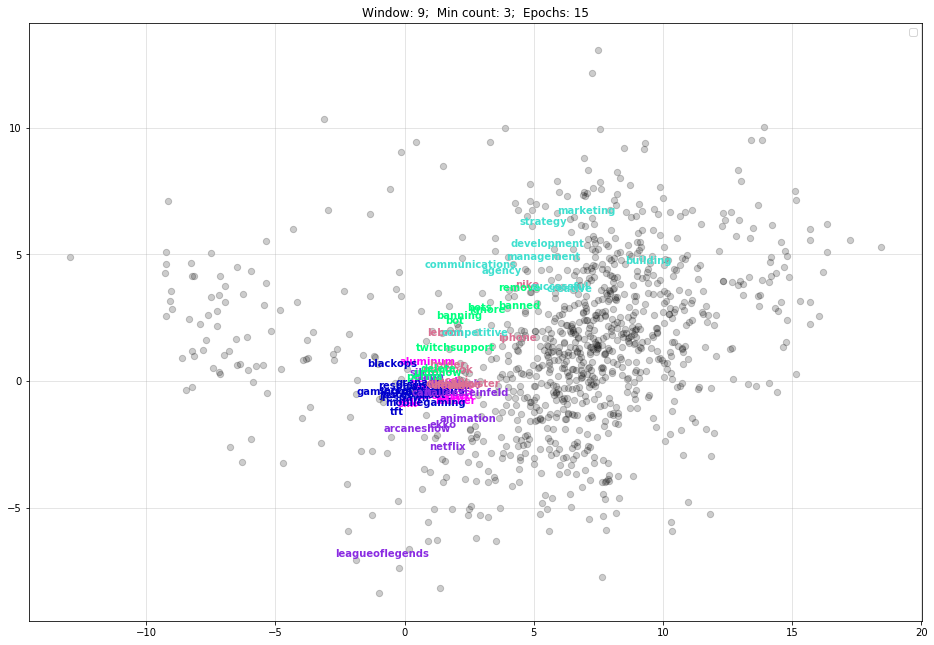

96 twitter_models\word2vec_9-window_3-min_5-epochs.model


No handles with labels found to put in legend.


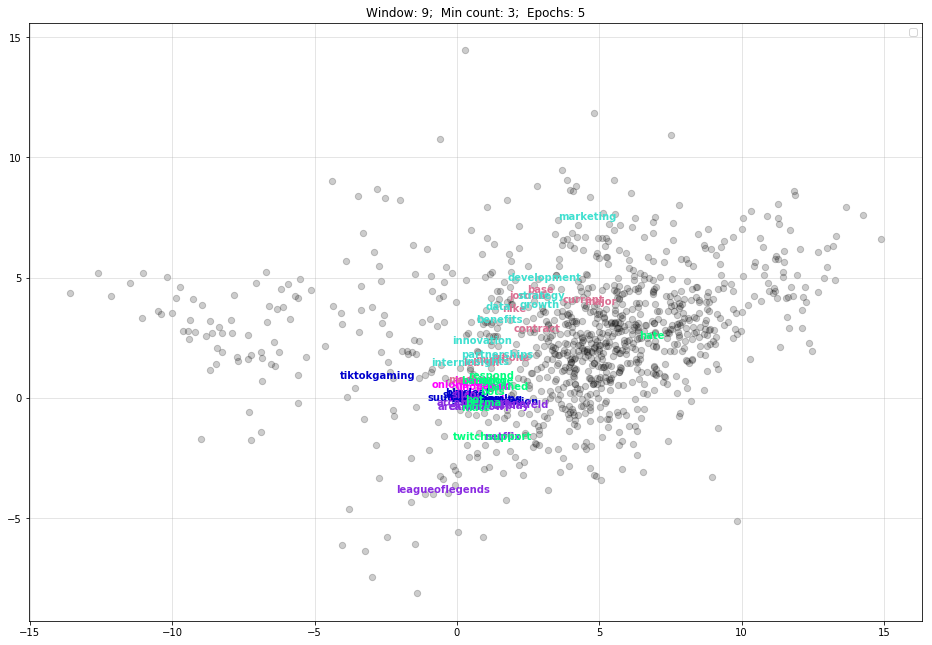

97 twitter_models\word2vec_9-window_4-min_10-epochs.model


No handles with labels found to put in legend.


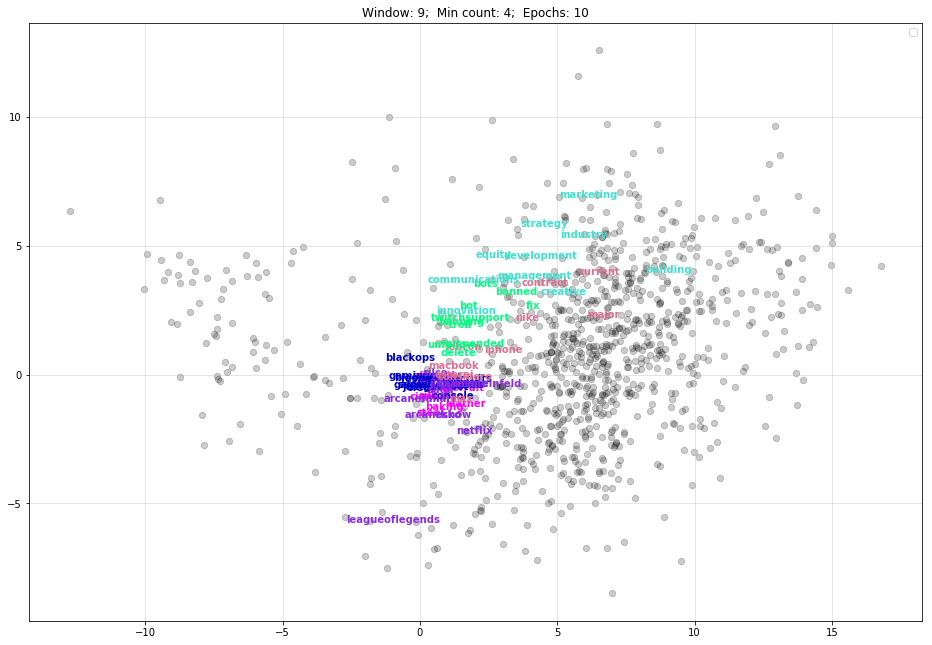

98 twitter_models\word2vec_9-window_4-min_15-epochs.model


No handles with labels found to put in legend.


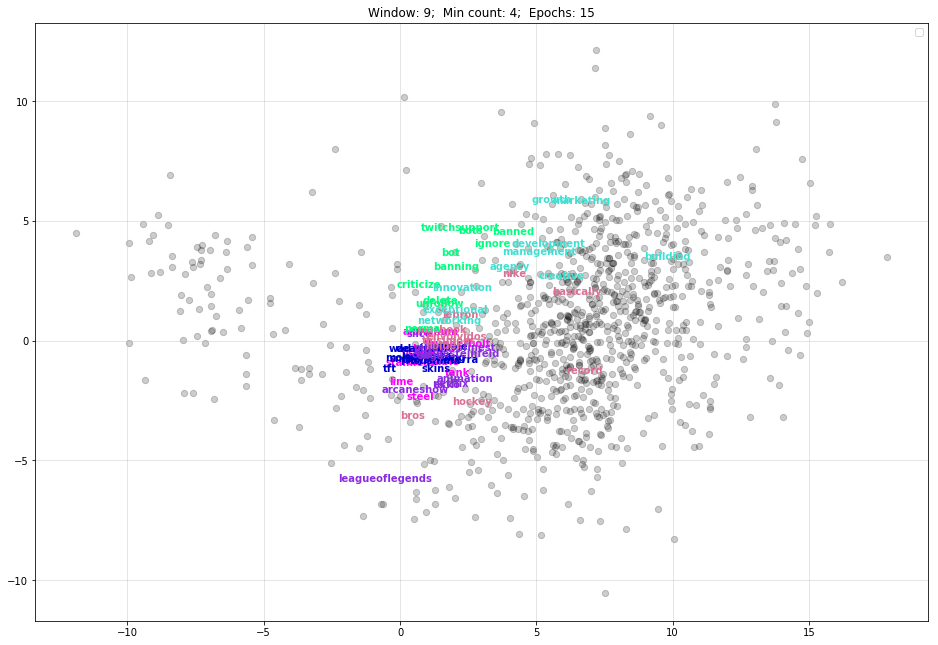

99 twitter_models\word2vec_9-window_4-min_5-epochs.model


No handles with labels found to put in legend.


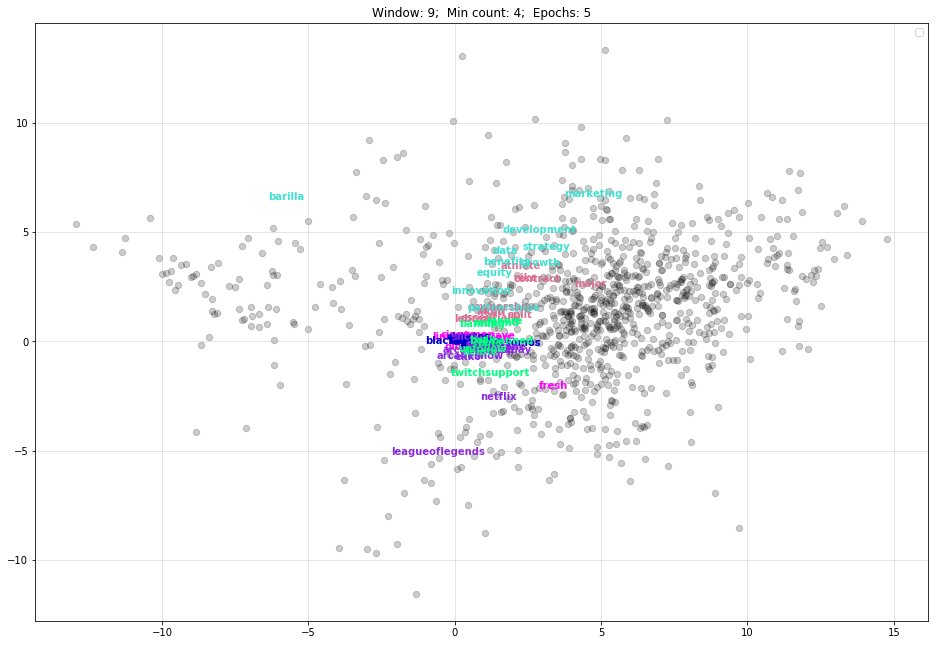

In [4]:
import os
directory = 'twitter_models'

model_files = list()
i=1
words = [
    ('patch','fuchsia'),
    ('nerf','mediumblue'),
    ('arcane','blueviolet'),
    ('pro','palevioletred'),
    ('ban','springgreen'),
    ('professional','turquoise')
]
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    print(i, f)
    i+=1
    if os.path.isfile(f) and not "npy" in f:
        name = str(os.path.join('figures', filename.split('.')[0])) + ".png"
        
        m1 = gensim.models.Word2Vec.load(f)
        helper1 = GensimWord2vecPlotter(m1)
        
        helper1.plot_scatter_words(Size=1000)
        df = helper1.getPandasDF()
        
        for word in words:
            plotwords(m1, word[0],word[1], df)
        plt.savefig(name)
        plt.show()
        

Even after looking at all 99 plots multiple times, it's hard to pick a top model. When producing a gif of the models (available at /capstone/figures/all_models.gif), we see that words of the same group (as indicated by color) tend to stay in similar regions. The spread of the words, however, changes slightly across models. The idea of visualizing the model was to see what model groups similar words best, but it appears that other metrics are necessary. See more in the next section.

# Evaluation

In [9]:
import os
from tqdm import tqdm
directory = 'twitter_models'
similarities1 = dict()
similarities2 = dict()
similarities3 = dict()
similarities4 = dict()
similarities5 = dict()
similarities6 = dict()
similarities7 = dict()
for filename in tqdm(os.listdir(directory)):
    
    f = os.path.join(directory, filename)
    
    if os.path.isfile(f) and not "npy" in f:
        print(f)
        m = gensim.models.Word2Vec.load(f)
        
        similarities1[filename] = m.wv.distance("jinx","caitlyn")
        similarities2[filename] = m.wv.distance("easily", "squishy")
        similarities3[filename] = m.wv.distance("professional", "young")
        similarities4[filename] = m.wv.distance("buff", "weak")
        similarities5[filename] = m.wv.distance("cait", "vi")
        similarities6[filename] = m.wv.distance("patch", "skin")
        similarities7[filename] = m.wv.distance("twitch", "streamer")

  0%|          | 0/99 [00:00<?, ?it/s]

twitter_models\word2vec-minibatch-1-model-2.model


  1%|          | 1/99 [00:04<06:38,  4.07s/it]

twitter_models\word2vec-minibatch-1-model-3.model


  4%|▍         | 4/99 [00:08<05:15,  3.32s/it]

twitter_models\word2vec-minibatch-1.model


  7%|▋         | 7/99 [00:12<04:05,  2.67s/it]

twitter_models\word2vec_10-window_2-min_10-epochs.model


 10%|█         | 10/99 [00:16<03:19,  2.25s/it]

twitter_models\word2vec_10-window_2-min_15-epochs.model


 13%|█▎        | 13/99 [00:19<02:48,  1.96s/it]

twitter_models\word2vec_10-window_2-min_5-epochs.model


 16%|█▌        | 16/99 [00:23<02:21,  1.70s/it]

twitter_models\word2vec_10-window_3-min_10-epochs.model


 19%|█▉        | 19/99 [00:25<01:56,  1.46s/it]

twitter_models\word2vec_10-window_3-min_15-epochs.model


 20%|██        | 20/99 [00:28<02:32,  1.93s/it]

twitter_models\word2vec_10-window_3-min_5-epochs.model


 21%|██        | 21/99 [00:30<02:31,  1.94s/it]

twitter_models\word2vec_10-window_4-min_10-epochs.model


 22%|██▏       | 22/99 [00:32<02:13,  1.73s/it]

twitter_models\word2vec_10-window_4-min_15-epochs.model


 23%|██▎       | 23/99 [00:33<01:58,  1.56s/it]

twitter_models\word2vec_10-window_4-min_5-epochs.model


 24%|██▍       | 24/99 [00:34<01:45,  1.41s/it]

twitter_models\word2vec_5-window_2-min_10-epochs.model


 25%|██▌       | 25/99 [00:36<01:55,  1.56s/it]

twitter_models\word2vec_5-window_2-min_15-epochs.model


 28%|██▊       | 28/99 [00:38<01:32,  1.31s/it]

twitter_models\word2vec_5-window_2-min_5-epochs.model


 31%|███▏      | 31/99 [00:40<01:18,  1.15s/it]

twitter_models\word2vec_5-window_3-min_10-epochs.model


 34%|███▍      | 34/99 [00:42<01:01,  1.06it/s]

twitter_models\word2vec_5-window_3-min_15-epochs.model


 35%|███▌      | 35/99 [00:43<01:03,  1.01it/s]

twitter_models\word2vec_5-window_3-min_5-epochs.model


 36%|███▋      | 36/99 [00:44<01:05,  1.04s/it]

twitter_models\word2vec_5-window_4-min_10-epochs.model


 37%|███▋      | 37/99 [00:45<01:01,  1.01it/s]

twitter_models\word2vec_5-window_4-min_15-epochs.model


 38%|███▊      | 38/99 [00:46<00:56,  1.08it/s]

twitter_models\word2vec_5-window_4-min_5-epochs.model


 39%|███▉      | 39/99 [00:46<00:54,  1.10it/s]

twitter_models\word2vec_6-window_2-min_10-epochs.model


 40%|████      | 40/99 [00:48<01:05,  1.10s/it]

twitter_models\word2vec_6-window_2-min_15-epochs.model


 43%|████▎     | 43/99 [00:49<00:51,  1.09it/s]

twitter_models\word2vec_6-window_2-min_5-epochs.model


 46%|████▋     | 46/99 [00:51<00:41,  1.27it/s]

twitter_models\word2vec_6-window_3-min_10-epochs.model


 49%|████▉     | 49/99 [00:52<00:33,  1.50it/s]

twitter_models\word2vec_6-window_3-min_15-epochs.model


 51%|█████     | 50/99 [00:53<00:38,  1.27it/s]

twitter_models\word2vec_6-window_3-min_5-epochs.model


 52%|█████▏    | 51/99 [00:54<00:40,  1.18it/s]

twitter_models\word2vec_6-window_4-min_10-epochs.model


 53%|█████▎    | 52/99 [00:55<00:38,  1.23it/s]

twitter_models\word2vec_6-window_4-min_15-epochs.model


 54%|█████▎    | 53/99 [00:55<00:35,  1.28it/s]

twitter_models\word2vec_6-window_4-min_5-epochs.model


 55%|█████▍    | 54/99 [00:56<00:34,  1.30it/s]

twitter_models\word2vec_7-window_2-min_10-epochs.model


 56%|█████▌    | 55/99 [00:58<00:46,  1.05s/it]

twitter_models\word2vec_7-window_2-min_15-epochs.model


 59%|█████▊    | 58/99 [00:59<00:36,  1.12it/s]

twitter_models\word2vec_7-window_2-min_5-epochs.model


 62%|██████▏   | 61/99 [01:01<00:29,  1.29it/s]

twitter_models\word2vec_7-window_3-min_10-epochs.model


 65%|██████▍   | 64/99 [01:02<00:22,  1.54it/s]

twitter_models\word2vec_7-window_3-min_15-epochs.model


 66%|██████▌   | 65/99 [01:03<00:25,  1.32it/s]

twitter_models\word2vec_7-window_3-min_5-epochs.model


 67%|██████▋   | 66/99 [01:04<00:29,  1.12it/s]

twitter_models\word2vec_7-window_4-min_10-epochs.model


 68%|██████▊   | 67/99 [01:05<00:28,  1.13it/s]

twitter_models\word2vec_7-window_4-min_15-epochs.model


 69%|██████▊   | 68/99 [01:06<00:27,  1.12it/s]

twitter_models\word2vec_7-window_4-min_5-epochs.model


 70%|██████▉   | 69/99 [01:07<00:26,  1.14it/s]

twitter_models\word2vec_8-window_2-min_10-epochs.model


 71%|███████   | 70/99 [01:09<00:32,  1.11s/it]

twitter_models\word2vec_8-window_2-min_15-epochs.model


 74%|███████▎  | 73/99 [01:10<00:24,  1.08it/s]

twitter_models\word2vec_8-window_2-min_5-epochs.model


 77%|███████▋  | 76/99 [01:12<00:18,  1.26it/s]

twitter_models\word2vec_8-window_3-min_10-epochs.model


 80%|███████▉  | 79/99 [01:12<00:13,  1.54it/s]

twitter_models\word2vec_8-window_3-min_15-epochs.model


 81%|████████  | 80/99 [01:14<00:14,  1.27it/s]

twitter_models\word2vec_8-window_3-min_5-epochs.model


 82%|████████▏ | 81/99 [01:14<00:14,  1.21it/s]

twitter_models\word2vec_8-window_4-min_10-epochs.model


 83%|████████▎ | 82/99 [01:15<00:13,  1.23it/s]

twitter_models\word2vec_8-window_4-min_15-epochs.model


 84%|████████▍ | 83/99 [01:16<00:12,  1.26it/s]

twitter_models\word2vec_8-window_4-min_5-epochs.model


 85%|████████▍ | 84/99 [01:17<00:11,  1.28it/s]

twitter_models\word2vec_9-window_2-min_10-epochs.model


 86%|████████▌ | 85/99 [01:18<00:13,  1.00it/s]

twitter_models\word2vec_9-window_2-min_15-epochs.model


 89%|████████▉ | 88/99 [01:20<00:09,  1.17it/s]

twitter_models\word2vec_9-window_2-min_5-epochs.model


 92%|█████████▏| 91/99 [01:21<00:05,  1.34it/s]

twitter_models\word2vec_9-window_3-min_10-epochs.model


 95%|█████████▍| 94/99 [01:22<00:03,  1.61it/s]

twitter_models\word2vec_9-window_3-min_15-epochs.model


 96%|█████████▌| 95/99 [01:23<00:02,  1.40it/s]

twitter_models\word2vec_9-window_3-min_5-epochs.model


 97%|█████████▋| 96/99 [01:24<00:02,  1.20it/s]

twitter_models\word2vec_9-window_4-min_10-epochs.model


 98%|█████████▊| 97/99 [01:25<00:01,  1.21it/s]

twitter_models\word2vec_9-window_4-min_15-epochs.model


 99%|█████████▉| 98/99 [01:26<00:00,  1.26it/s]

twitter_models\word2vec_9-window_4-min_5-epochs.model


100%|██████████| 99/99 [01:27<00:00,  1.29it/s]


In [10]:
bestest = dict()

In [11]:
def count_best(d):
    for i in d:
        if i[0] in bestest.keys():
            bestest[i[0]] += 1
        else:
            bestest[i[0]] = 1

**Example of top five shortest distances for "jinx" and "cait"**

In [12]:
sorted(similarities1.items(), key = lambda x: x[1])[:5]

[('word2vec_7-window_2-min_15-epochs.model', 0.6265238523483276),
 ('word2vec_10-window_4-min_15-epochs.model', 0.6318922936916351),
 ('word2vec_7-window_4-min_15-epochs.model', 0.6352953016757965),
 ('word2vec_6-window_4-min_15-epochs.model', 0.6411302387714386),
 ('word2vec_9-window_3-min_15-epochs.model', 0.6497959494590759)]

In [13]:
count_best(sorted(similarities1.items(), key = lambda x: x[1])[:3])

In [14]:
count_best(sorted(similarities2.items(), key = lambda x: x[1])[:3])

In [15]:
count_best(sorted(similarities3.items(), key = lambda x: x[1])[:3])

In [16]:
count_best(sorted(similarities4.items(), key = lambda x: x[1])[:3])

In [17]:
count_best(sorted(similarities5.items(), key = lambda x: x[1])[:3])

In [18]:
count_best(sorted(similarities6.items(), key = lambda x: x[1])[:3])

In [19]:
count_best(sorted(similarities7.items(), key = lambda x: x[1])[:3])

Sort descending by frequency of top three models

In [20]:
sorted(bestest.items(), key = lambda x: -x[1])

[('word2vec_7-window_2-min_15-epochs.model', 2),
 ('word2vec_7-window_2-min_5-epochs.model', 2),
 ('word2vec_6-window_2-min_15-epochs.model', 2),
 ('word2vec_9-window_2-min_5-epochs.model', 2),
 ('word2vec_5-window_2-min_5-epochs.model', 2),
 ('word2vec_10-window_4-min_15-epochs.model', 1),
 ('word2vec_7-window_4-min_15-epochs.model', 1),
 ('word2vec-minibatch-1-model-3.model', 1),
 ('word2vec_5-window_3-min_5-epochs.model', 1),
 ('word2vec_10-window_4-min_10-epochs.model', 1),
 ('word2vec_6-window_2-min_5-epochs.model', 1),
 ('word2vec_7-window_3-min_15-epochs.model', 1),
 ('word2vec-minibatch-1-model-2.model', 1),
 ('word2vec_10-window_2-min_5-epochs.model', 1),
 ('word2vec_8-window_2-min_5-epochs.model', 1),
 ('word2vec-minibatch-1.model', 1)]

Here, it's also interesting to note that not once is there a model with a window of 7 among the best models, and we only see a model that ran 15 epochs once among the top models. What would Tyra Banks have to say?

# Final Comment

Our best model is ```/capstone/models/word2vec_7-window_2-min_15-epochs.model``` based on seven pairs of ground truth similar words, which models had the smallest distances for those words, and which of those models were the most frequent across the seven pairs.